## Polynomial Regression Model
Polynomial regression is a type of regression analysis that is used to model relationships between a dependent variable and one or more independent variables using a polynomial equation. It is often used when data exhibits a non-linear relationship, as linear regression may not produce accurate results in such cases. In polynomial regression, the original features are transformed into polynomial features of a specified degree and modeled using a linear model.

The aim of this project is to build a polynomial regression model to predict the points scored by a sports team based on various attributes. The project will involve exploratory data analysis, data preprocessing, and model building, as well as a thorough explanation of various regression metrics.

The data for this project consists of information about points scored by sports teams based on various attributes.

#### the Goal of this Project:
1. In the ask phase - write a clear statement of the business task: Is there a better way to model the NBA dataset to produce a better model that predicts points scored by the NBA teams based on various attributes collected/provided.

2. In the prepare phase - you described the data sources you used: This data was provided by a anonymous sports agency that does not want to be identified due to potential liability. The data provides different data point like Point_Scored, Weightlifting, Yoga_Sessions, Laps_Run, Water_Intake and Player_Absent.

3. In the process phase - you documented your data cleaning and manipulation: The approach I took with this data is the following: 

My Approach:

**Data Preprocessing
*** Outlier removal
*** Imputing null values
*** Onehot encoding

**Model Building
*** Linear regression model building 
*** Polynomial regression model building

**Model Evaluation
*** Evaluation of model on test data
*** Discussion on various regression matrix-like R-squared, AIC, AICC, F-statistics

4.In the analyze phase - you write a summary of your analysis: Analysis of this project will be found at the end of the project.

In [8]:
#Import Libraries
import pandas as pd #data frame opertations
import numpy as np #arrays and math functions
import scipy as sp #scientific computing and technical computing
import matplotlib.pyplot as plt # comprehensive library for creating static, animated, and interactive visualizations 
%matplotlib inline 
import seaborn as sns #data visualization library based on matplotlib

import warnings
warnings.filterwarnings('ignore')


In [11]:
#upload dataframe as df
data = pd.read_csv('NBA_Dataset_csv.csv')

In [12]:
#Explore Data/Familiarize your self with what you are working with
data.head(25)

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0
5,Lakers,97,27.0,NaN,35.0,5.0,1.0
6,Lakers,158,27.0,NaN,35.0,6.0,3.0
7,Lakers,110,28.0,NaN,35.0,5.0,7.0
8,Lakers,154,1111111.0,NaN,35.0,6.0,8.0
9,Lakers,147,29.0,26.0,36.0,6.0,NaN


#### Observations
notice missing values in Yoga_Sessions_Average column, Weightlifting_Sessions_Average, and Laps_Run_Per_Practice_Average
notice incorrect entry in Weightlifting_Sessions_Average

In [13]:
#determine the dimensions of the dataframe
print('Dimension of the dataframe is= ', data.shape)

Dimension of the dataframe is=  (159, 7)


The columns attribute of a DataFrame in the pandas library is used to access the column labels of the DataFrame. It is often used to list the names of the columns in a DataFrame, or to access specific columns by name.

The columns attribute is often used in data exploration and cleaning, as it allows you to easily access and manipulate specific columns in a DataFrame.

Overall, the columns attribute is a useful tool for accessing and working with the columns of a DataFrame in the pandas library.

In [14]:
#determine which columns you will be working with
data.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

The info() method in Python is a method of the DataFrame class from the pandas library, which is used for data manipulation and analysis. It is used to obtain a summary of the data contained in a DataFrame, including the data types of each column, the number of non-null values in each column, and the memory usage of the DataFrame.The info() method is often used as a preliminary step in data exploration and cleaning, as it can help you to identify missing values, data types, and other issues that might need to be addressed before building models or performing further analysis.

Overall, the info() method is a useful tool for obtaining a summary of the data contained in a DataFrame, and can help you to better understand the structure and content of your data.

In [15]:
#Determine what dtypes of columns are you working with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


The rename() method in the pandas library is used to rename the labels of a DataFrame. In the code you provided, the rename() method is used to rename the columns of a DataFrame by providing a mapping of old column names to new column names in a dictionary

The rename() method is often used in data exploration and cleaning, as it allows you to easily change the names of columns to make them more meaningful or easier to work with.

Overall, the rename() method is a useful tool for renaming the labels of a DataFrame in the pandas library.

In [16]:
#shorten columns names by renaming  
df = data.rename(columns={'Points_Scored' : 'PS', 'Weightlifting_Sessions_Average' : 'WL','Yoga_Sessions_Average' : 'YS', 'Laps_Run_Per_Practice_Average' : 'LRPP',
                        'Water_Intake' : 'WI', 'Players_Absent_For_Sessions' : 'PAFS'})

In [17]:
#check to ensure that column names have changed accordingly
df.head()

,Team,PS,WL,YS,LRPP,WI,PAFS
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [18]:
#Start creating a distribution plot by determining what type of information is in the PS (renamed Points) column
#column holds int64 information
df.PS

0      242
1      144
2      156
3      159
4      106
      ... 
154     12
155     13
156     12
157     20
158      0
Name: PS, Length: 159, dtype: int64

The distplot() function from the seaborn library is used to visualize the distribution of a dataset. It plots a histogram of the data and fits a probability density function (PDF) or kernel density estimate (KDE) to the data.

In the code you provided, the distplot() function is being used to plot a histogram and fit a KDE of the PS column of a DataFrame named df. The resulting plot is being stored in a variable ax.

The distplot() function is often used in data exploration and visualization, as it allows you to examine the distribution of a dataset and identify patterns or trends.

Overall, the distplot() function is a useful tool for visualizing the distribution of a dataset in the seaborn library.


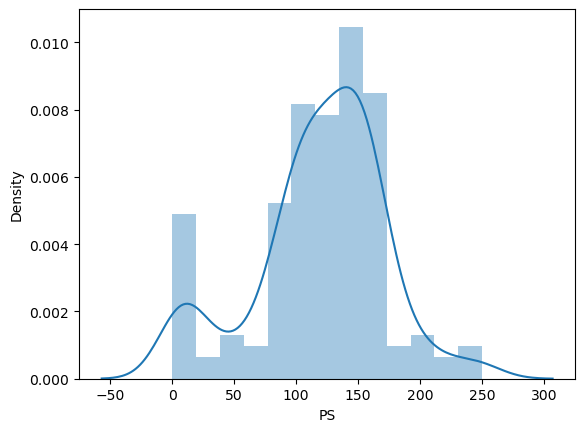

In [19]:
#DistPlot - A plotting function that combines matplolib histogram and a kernel density plot together. Smoothens out the histogram that we built and gives us a gerenal understanding of the shape of distribution
#sns.displot(df.PS) --> use this if the below code gives error
#highest density of points are around 150
#notice that there are a couple of values are near zero
ax = sns.distplot(df.PS)

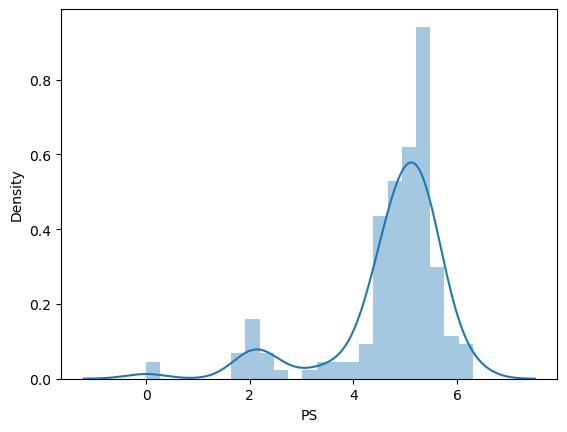

In [20]:
# tried using a ax = sns.distplot(np.log(df.PS)) but ran into an error because the log of 0 is undefined.
#that is why i used the cubed root (cbrt) for this graph.
ax = sns.distplot(np.cbrt(df.PS))

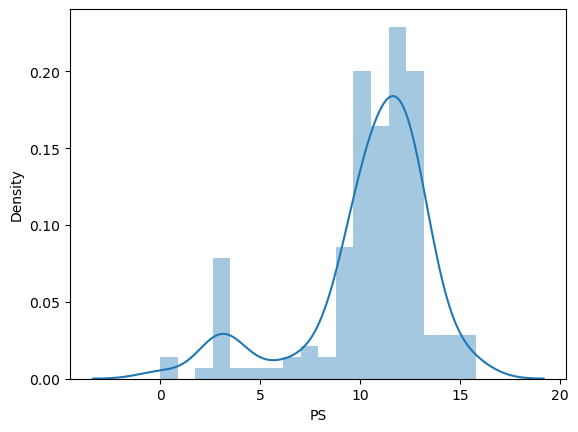

In [21]:
#Wanted to comapre the distplot cubed root with a distplot sqrt root to determine if there are any obvious differences.
#notice that the distplot sqrt verison is slightly smoother then the distplot cubed root(cbrt) 
ax = sns.distplot(np.sqrt(df.PS))

<AxesSubplot:xlabel='PS'>

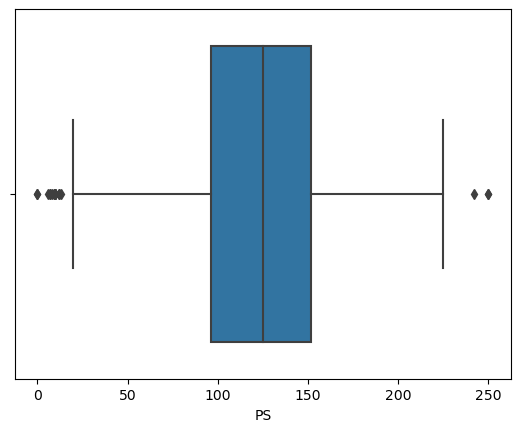

In [22]:
#boxplot visualization to see if there are any outliers
#I noticed that there were multiple outliers on bothends of the spectrum
#remember that outliers tell a story as well
sns.boxplot(df.PS)

Notice all the outliers. You need determine the impact these outliers have on you analysis.

In [23]:
# I just wanted to see if there obvious outliers
# Notice that the data outliers span multiple teams and columns
df.head(100)

,Team,PS,WL,YS,LRPP,WI,PAFS
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0
...,...,...,...,...,...,...,...
95,Trailblazers,170,22.0,13.0,25.0,3.0,5.0
96,Trailblazers,225,22.0,15.0,26.0,3.0,5.0
97,Trailblazers,145,22.0,19.0,26.0,3.0,7.0
98,Trailblazers,188,23.0,19.0,26.0,3.0,1.0


In [24]:
# Creating a box plot and a violin plot function to determine how density and location of data points and outliers.
# This function is set up for each column
# Notice that WL column Violin and Box plot are distorted due to an outlier 
def plotting_box_violin_plots(df,x,y):
    fig,axes=plt.subplots(1,2,figsize=(18,10))
    fig.suptitle("Violin and Box Plots For Variable : {}" .format(y))
    
    sns.violinplot(ax=axes[0], x=x, y=y, data=df)
    sns.boxplot(ax=axes[1], data=df[y])
    
    axes[0].set_title("Violin Plots For Variable : {}" .format(y))
    axes[1].set_title("Box Plots For Variable : {}" .format(y))

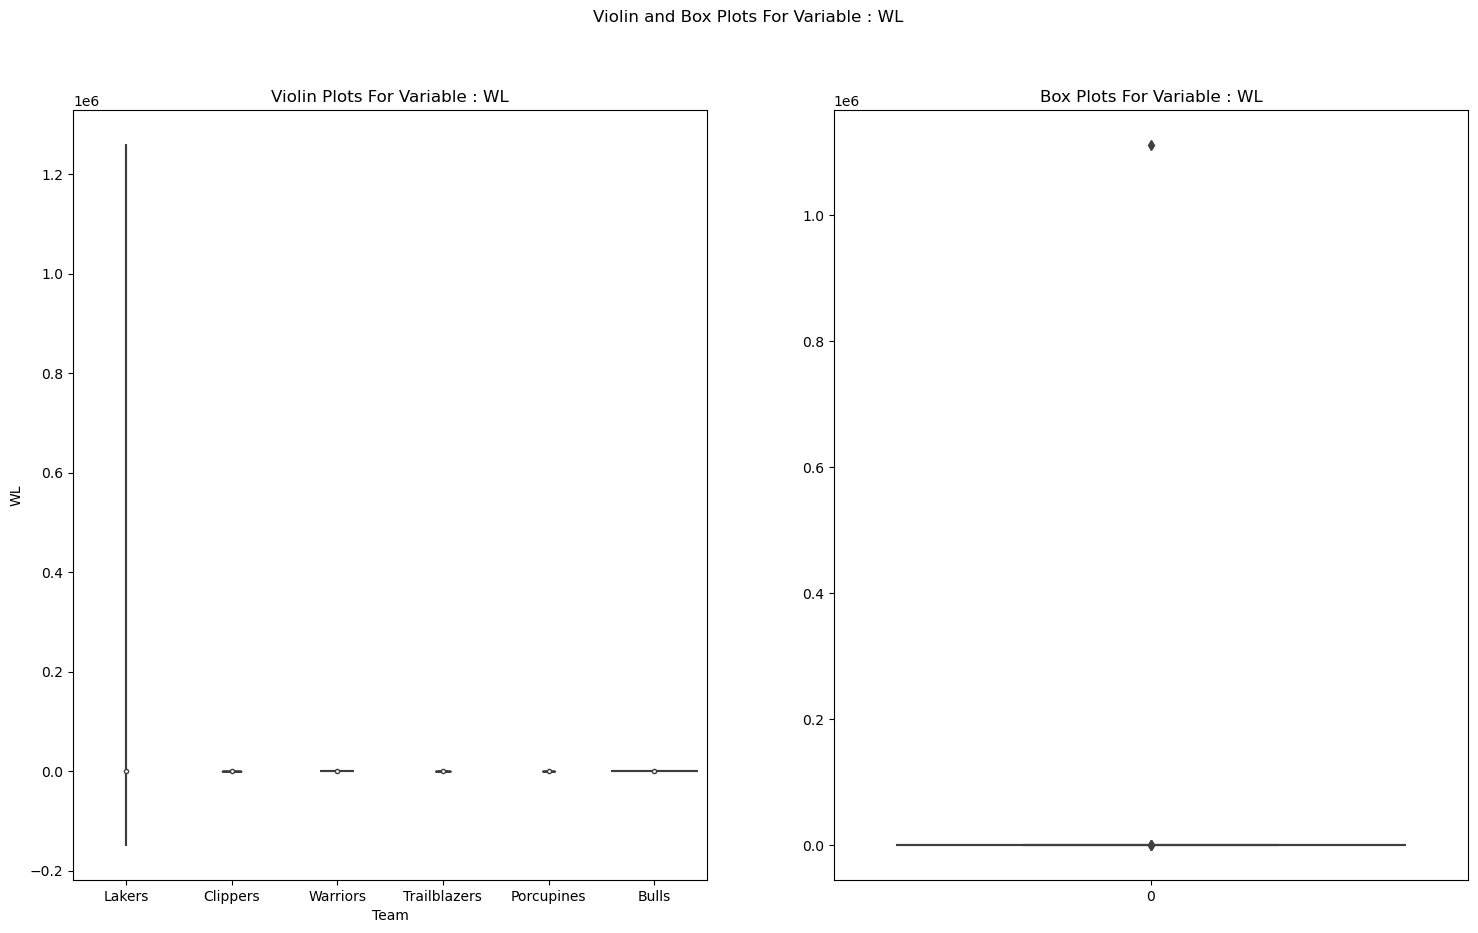

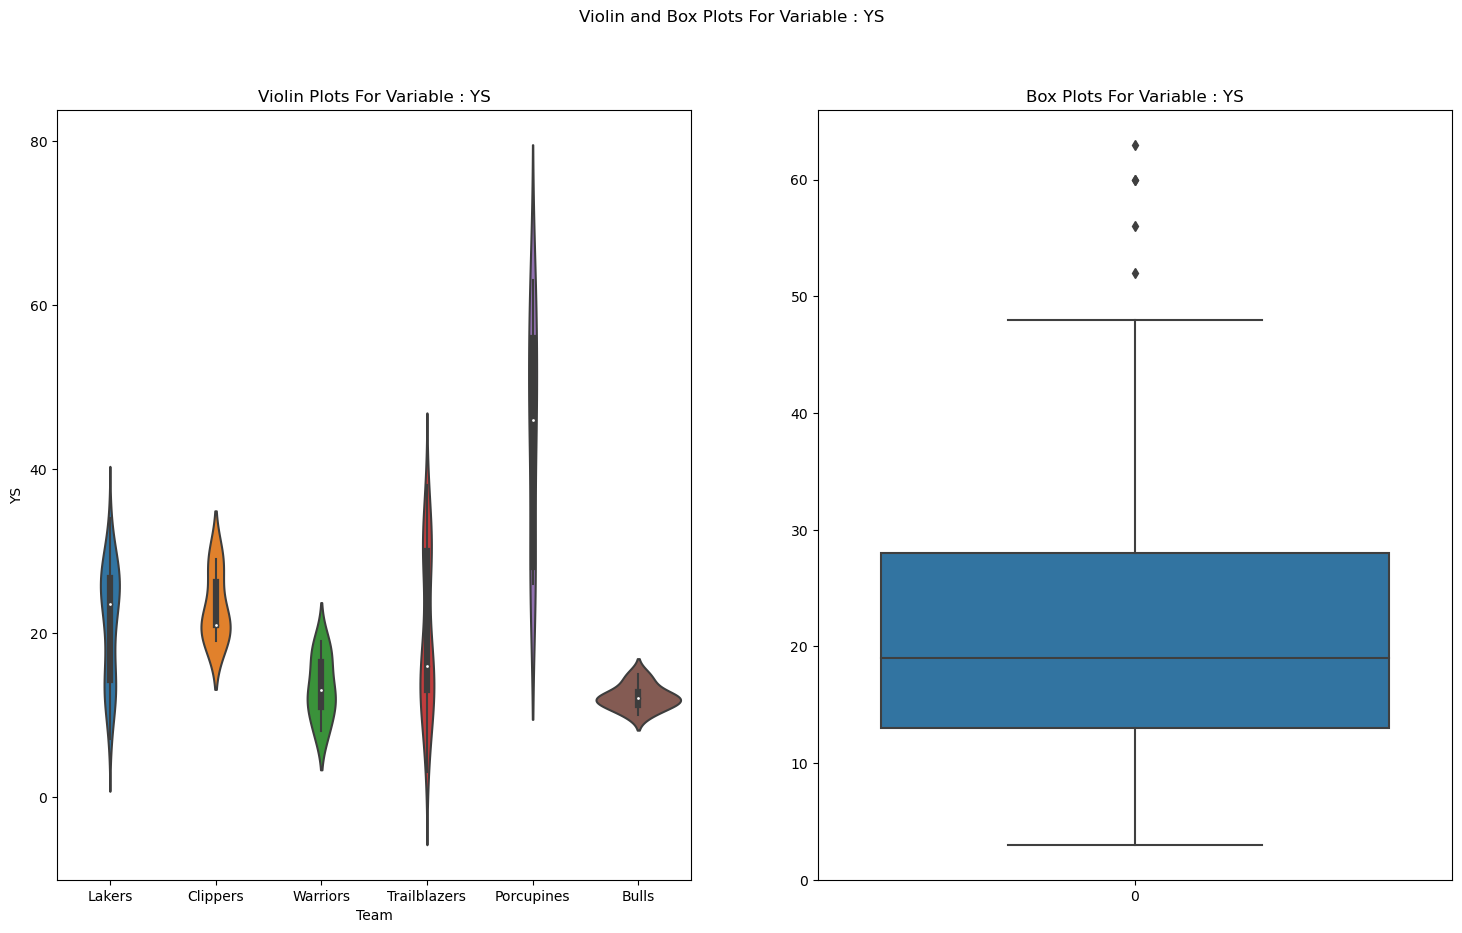

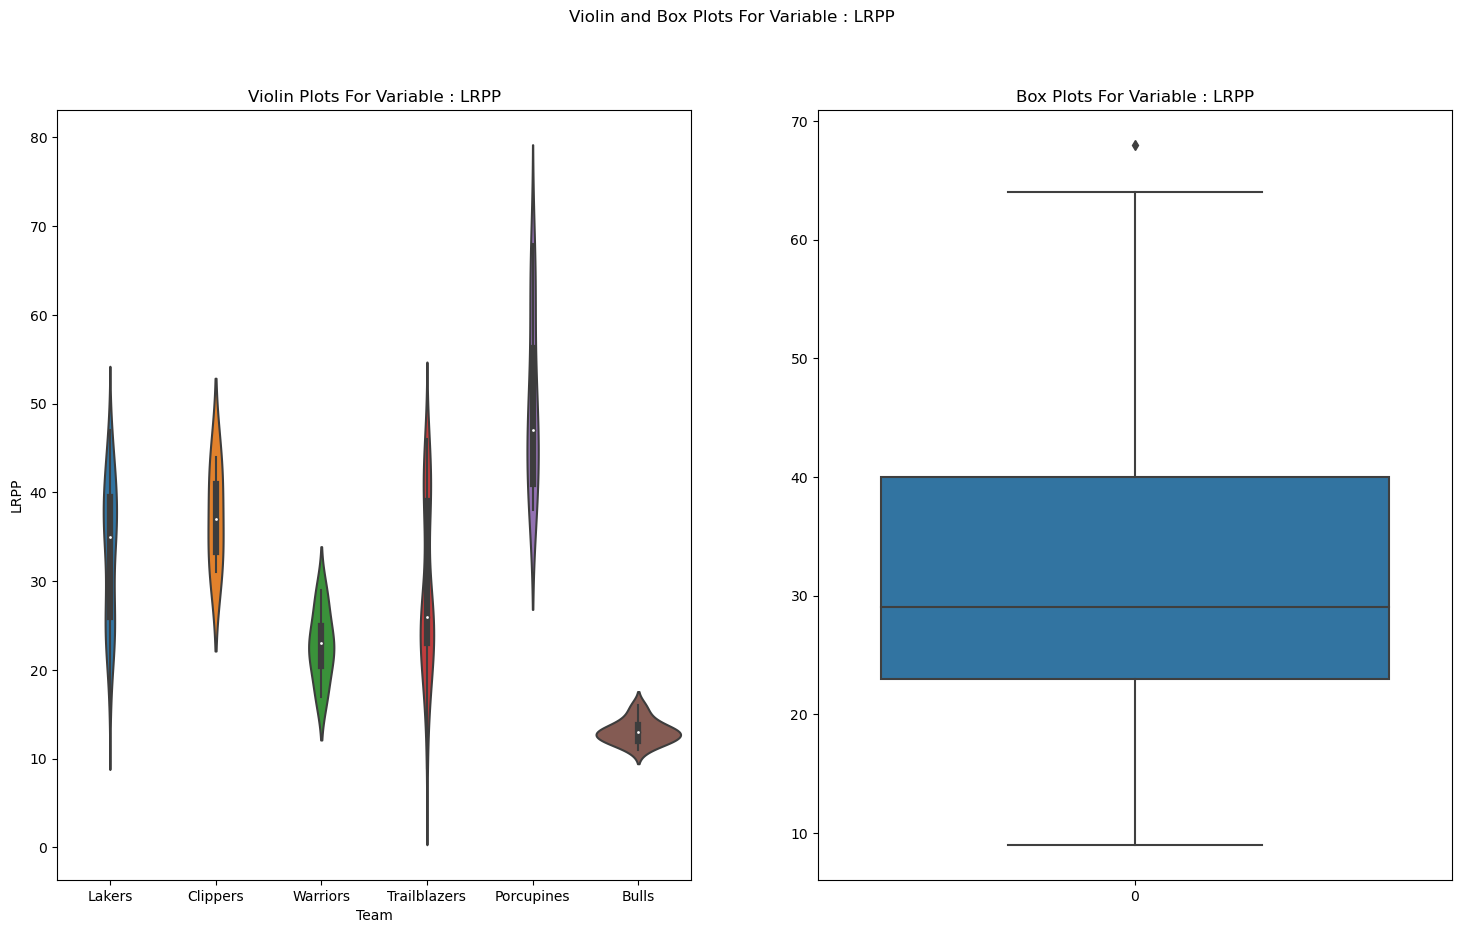

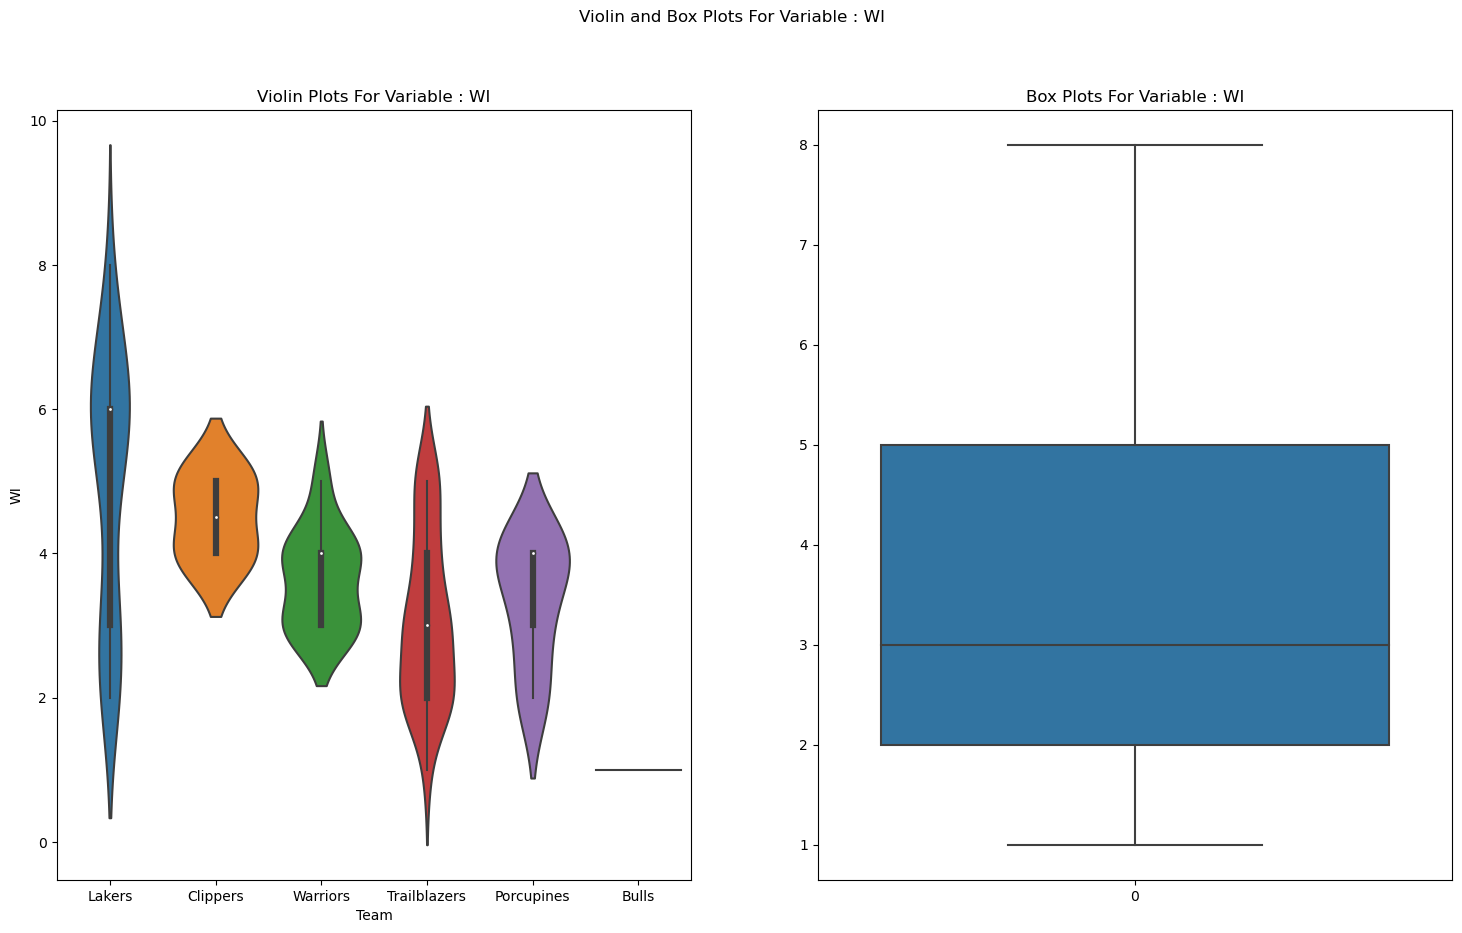

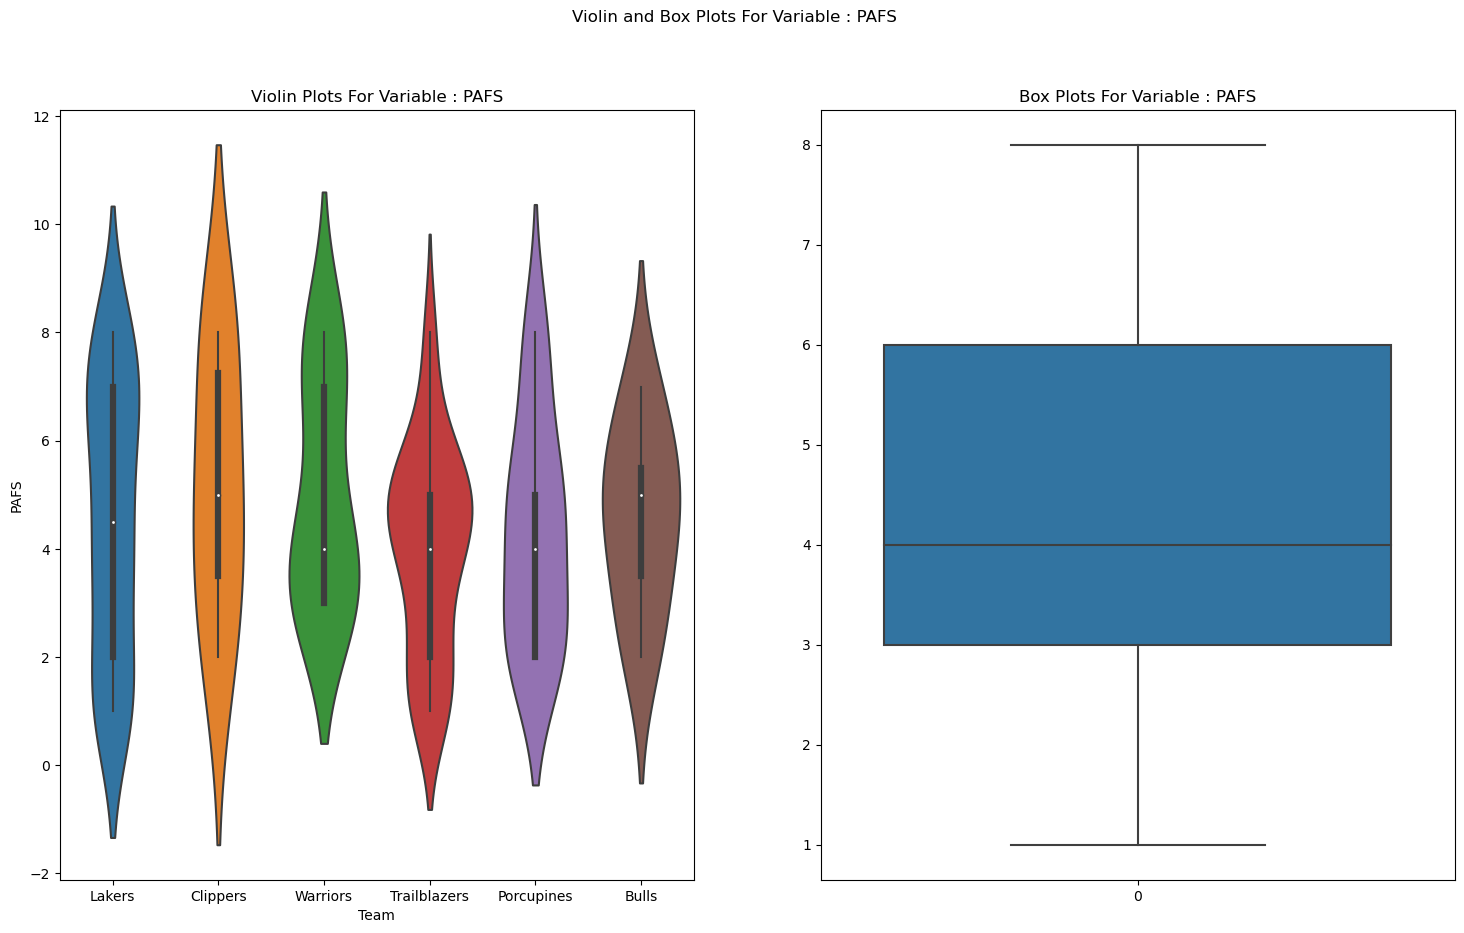

In [25]:
for x in['WL', 'YS', 'LRPP', 'WI', 'PAFS']:
    plotting_box_violin_plots(df,"Team", x)

In [26]:
#function for finding out outliers by defining the parameters on what classifies an outlier using the Q1 to Q3
#setermined that any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
# some use 2 IQR or even 3 IQR
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    Upper_End = Q3+1.5*IQR
    Lower_End = Q1-1.5*IQR
    
    outlier = df[column][(df[column]>Upper_End) | (df[column]<Lower_End) ]
    
    return outlier

In [27]:
#Run the above function across are columns to determine outliers
#notice WL columns 8, 142, 143, 144 are outliers
#notice YS columns 140, 141, 142, 143, 144 are outliers
#notice LRP columns 144 is an outlier
#notice WI, and PAFS do nt have any outliers
for column in ['WL', 'YS', 'LRPP', 'WI', 'PAFS']:
    print ('\n Outliers in column "%s"' %column)
    
    outlier = find_outliers(df, column)
    print(outlier)


 Outliers in column "WL"
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outliers in column "YS"
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: YS, dtype: float64

 Outliers in column "LRPP"
144    68.0
Name: LRPP, dtype: float64

 Outliers in column "WI"
Series([], Name: WI, dtype: float64)

 Outliers in column "PAFS"
Series([], Name: PAFS, dtype: float64)


In [28]:
#Confirming column names
df.columns

Index(['Team', 'PS', 'WL', 'YS', 'LRPP', 'WI', 'PAFS'], dtype='object')

In [29]:
#removing observation outliers 142, 143, 144
df_clean=df.drop([142,143,144])

In [30]:
#ensure that observations with determined outliers have been removed. Went from 159 observations to 156 observations
df_clean.shape

(156, 7)

In [31]:
#Replacing the 1111111.0 data found in row 8 of the WL column with nan (not a number)
df['WL'][df['WL']==1111111.0]=np.nan

In [32]:
df['WL']

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 159, dtype: float64

In [33]:
#Replacing the 1111111.0 data found in row 8 of the WL column with nan (not a number) for df_clean
df_clean['WL'][df_clean['WL']==1111111.0]=np.nan

In [34]:
df_clean['WL']

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

## Missing Value Imputation Techniques

In [35]:
#create a dataframe that determines how many data points are missing 
ncounts=pd.DataFrame([df_clean.isna().mean()]).T

In [36]:
#See the percentage of data points missing 
#Notice that Team and PS are not missing anydata points, while PAFS is missing 18.5% 
ncounts

,0
Team,0.000000
PS,0.000000
WL,0.064103
YS,0.128205
LRPP,0.089744
WI,0.089744
PAFS,0.185897


<AxesSubplot:title={'center':'% of Missing Values Across Each Column'}>

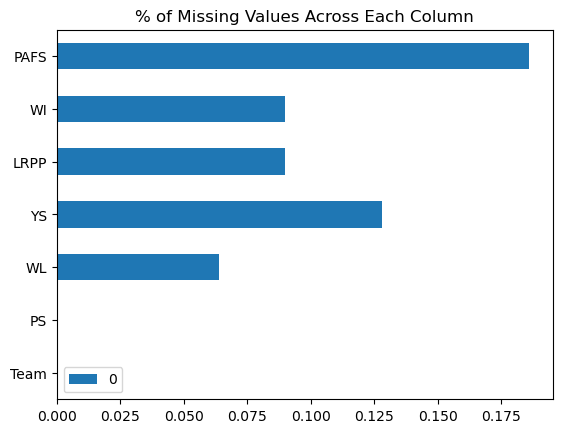

In [37]:
#plot out the percentage of missing points per column
ncounts.plot(kind ='barh', title='% of Missing Values Across Each Column')

#### three ways to fill in missing values
* #1. Pandas -> F fill and B fill, groupby
* #2. Sklearn -> Imputer -> Simple, Iterative, KNN
* #3. LGBM -> To fill in the missing vlaues

the logic that I use when determining if im going to drop a na/nan value. 
General rule I follow is to drop the least amount of data possible.
If missing few values are present from majority class then you can essentially drop them, but be cautious
Do not drop data from minority class


In [38]:
#this does not drop data, but will show you what your dataframe will look like if all observations with na or nan are dropped
#notice that the dataframe will drop from 156 to 94 observations. Not a good approach
df_clean.shape, df_clean.dropna(axis=0).shape

((156, 7), (94, 7))

In [39]:
#this does not drop data, but will show you what your dataframe will look like if columns with na or nan are dropped
#notice that the dataframe will drop from 7 columns to 2 columns. Not a good approach
df_clean.shape, df_clean.dropna(axis=1).shape

((156, 7), (156, 2))

#### Pandas Imputer

In [40]:
#check to see where and how many nulls you have per column
# Team and PS have zero nulls (confirmed)
# WL has 10 null values
# YS has 20 null values
# LRPP and WI has 14 null values
#PAFS has 29 null values

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    156 non-null    object 
 1   PS      156 non-null    int64  
 2   WL      146 non-null    float64
 3   YS      136 non-null    float64
 4   LRPP    142 non-null    float64
 5   WI      142 non-null    float64
 6   PAFS    127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


In [41]:
#To quickly find the nan values by replacing nan with -1
df_clean['WL'].fillna(-1)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

In [42]:
df_clean.head(100)

,Team,PS,WL,YS,LRPP,WI,PAFS
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0
...,...,...,...,...,...,...,...
95,Trailblazers,170,22.0,13.0,25.0,3.0,5.0
96,Trailblazers,225,22.0,15.0,26.0,3.0,5.0
97,Trailblazers,145,22.0,19.0,26.0,3.0,7.0
98,Trailblazers,188,23.0,19.0,26.0,3.0,1.0


In [43]:
#Dynamically compute the mean of the
df_clean['WL'].fillna(df_clean['WL'].mean())

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

<AxesSubplot:xlabel='WL', ylabel='Density'>

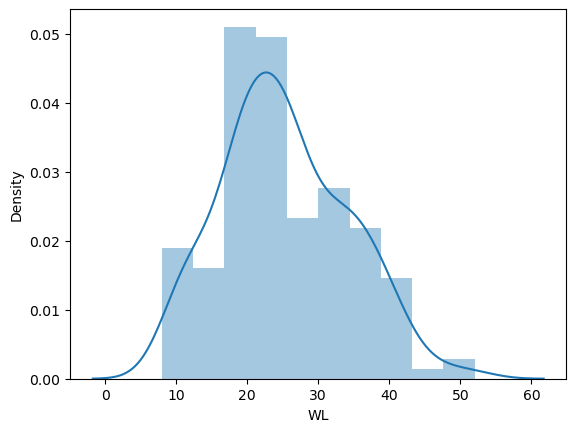

In [44]:
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].mean()))

<AxesSubplot:xlabel='WL', ylabel='Density'>

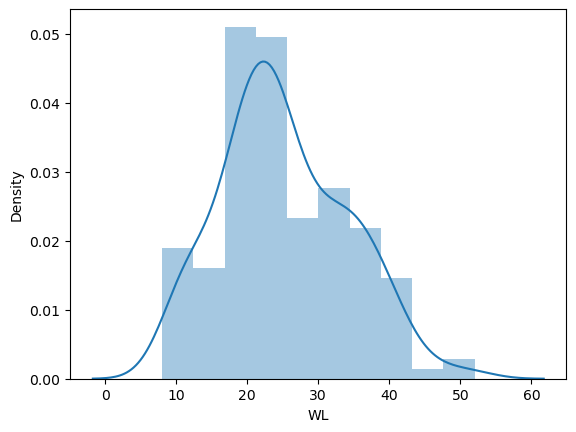

In [45]:
# The median graph will be more suseptiable to the influence of outliers when compared with the mean graph.
# by comparing the mean and the median I was able to determine that the dataframe was skewed in any way.
# the similiarity of both graphs indicate that there are no outliers skewing the results after placing the mean in for the null values.
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].median()))

In [46]:
# mean and median plots combined all teams information together, and does not indicate the mean of each team indivually. 
# To create a more accurate representation, replace nan values with the mean of the team that it is associated with
# Groupby each Team by their mean
mean_WL = df_clean.groupby('Team')['WL'].mean().to_dict() 

In [47]:
# Display the determined mean values 
# Bulls have the lost mean in the weightlifting column while Porcupines have the highest.
mean_WL

{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 26.04255319148936,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

In [48]:
#create a data frame that measure the mean of each team individually
WL_series = df_clean['WL'].replace(mean_WL)

<AxesSubplot:xlabel='WL', ylabel='Density'>

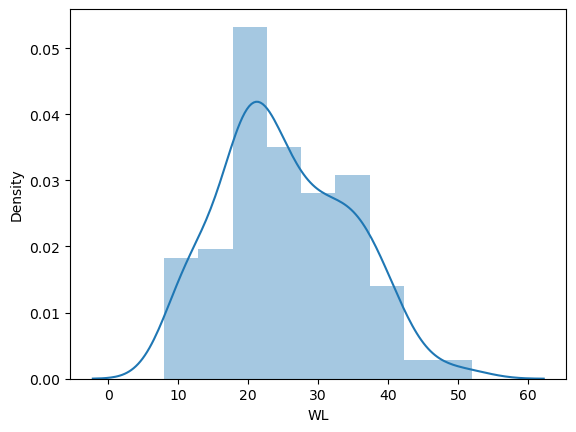

In [49]:
# Create a distplot that gvisually represents that mean of each team. 
# Notice the how the density of 23 to 26 decreased from just under 0.05 to roughly 3.65
sns.distplot(df_clean['WL'].replace(mean_WL))

#### Iterative and KNN Imputer

#1. Simple Imputer -
The SimpleImputer class provides basic strategies for imputing missing values.
Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. 
This class also allows for different missing values encodings.

In [50]:
#1. Simple Imputer
Features = ['WL', 'YS', 'LRPP', 'WI', 'PAFS']
from sklearn.impute import SimpleImputer
impt = SimpleImputer(strategy = 'mean') #here you put mean, median, most frequent or constant

#Fit and Transform
si_impt= impt.fit_transform(df_clean[Features])
si_impt_df = pd.DataFrame(si_impt,columns = Features)

si_impt_df

,WL,YS,LRPP,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,20.823529,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.417323
152,12.0,12.000000,14.0,1.0,4.417323
153,12.0,13.000000,14.0,1.0,4.417323
154,13.0,14.000000,15.0,1.0,6.000000


#2. Iterative Impute - 
Iterative imputation refers to a process where each feature is modeled as a function of the 
other features, e.g. a regression problem where missing values are predicted.

A, B, & C ----> Y  #Trying to clarify 

10 NA 20

NA - > regression (A,C) --> To predict B _> Prediciton of B -> Is replaced
Least amount of NA's

Roman -> Right to Left

In [51]:
#Iterative Impute
#The IterativeImputer class is very flexible - 
#it can be used with a variety of estimators to do round-robin regression, treating every variable as an output in turn.
from sklearn.experimental import enable_iterative_imputer

In [52]:
from sklearn.impute import IterativeImputer

ITI = IterativeImputer(max_iter=10) #number of iteration that you want it to run to determine the best value to fit in the null

#Fit and Transform
ITI_impt = ITI.fit_transform(df_clean[Features])

ITI_impt_df = pd.DataFrame(ITI_impt,columns = Features)

ITI_impt_df

,WL,YS,LRPP,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.063002,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.413163
152,12.0,12.000000,14.0,1.0,4.413298
153,12.0,13.000000,14.0,1.0,4.413450
154,13.0,14.000000,15.0,1.0,6.000000


notice that observation 4 has improved

#3. KNN Imputer
Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [53]:
from sklearn.impute import KNNImputer

KNN = KNNImputer(n_neighbors=3)

#Fit and Transform
KNN_impt = KNN.fit_transform(df_clean[Features])

KNN_impt_df = pd.DataFrame(KNN_impt,columns = Features)

KNN_impt_df

,WL,YS,LRPP,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.666667,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.666667
152,12.0,12.000000,14.0,1.0,5.333333
153,12.0,13.000000,14.0,1.0,6.000000
154,13.0,14.000000,15.0,1.0,6.000000


LGBM Imputer
where I got this code from: https://github.com/analokmaus/kuma_utils


In [54]:
#After cloning the lightgbm from GitHub, I realized that I need to install the lightgbm package 
pip install lightgbm

SyntaxError: invalid syntax (1654360125.py, line 2)

In [55]:
#Clone the GitHub REPO to establish a path to the directory
!git clone https://github.com/analokmaus/kuma_utils.git

fatal: destination path 'kuma_utils' already exists and is not an empty directory.


In [56]:
#sys.path is a built-in variable within the sys module. It contains a list of directories that the interpreter will search 
#in for the required module. 
#sys.path is a built-in variable within the sys module. 
#It contains a list of directories that the interpreter will search in for the required module. 
import sys
sys.path.append('kuma_utils.git/')

In [57]:
#Import the LGBMImputer
from kuma_utils.preprocessing.imputer import LGBMImputer

In [58]:
%%time
#set up the function to run with 100 interations
lgbm_itr=LGBMImputer(n_iter=100,verbose=True)

df_itr=lgbm_itr.fit_transform(df_clean[Features])

df_itr_df=pd.DataFrame(df_itr,columns = Features)

  0%|          | 0/5 [00:00<?, ?it/s]

Wall time: 126 ms


In [59]:
df_itr_df

,WL,YS,LRPP,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,24.357742,34.0,5.0,6.000000
...,...,...,...,...,...
154,12.0,12.000000,13.0,1.0,3.805411
155,12.0,12.000000,14.0,1.0,3.805411
156,12.0,13.000000,14.0,1.0,3.953409
157,13.0,14.000000,15.0,1.0,6.000000


In [60]:
df_new = df_itr_df

#### Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. Some ways you can describe patterns found in univariate data include central tendency (mean, mode and median) and dispersion: range , variance, maximum, minimum, quartiles (including the interquartile range), and standard deviation.

In [61]:
df_new.columns

Index(['WL', 'YS', 'LRPP', 'WI', 'PAFS'], dtype='object')

<AxesSubplot:xlabel='WL', ylabel='Density'>

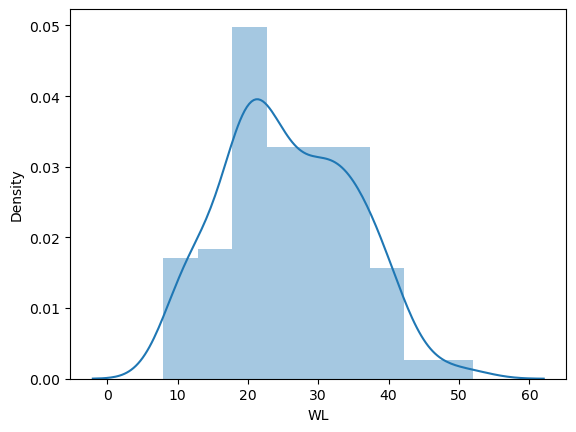

In [62]:
#checking for normal distribution you know who came out with a really good album christmas album whatever that's fully snappy what's the other ones they've got some in Spanish and it's a sensible way what's happening yeah that's why I don't care tucsone they die stay up that Italian or you said so pretty I'm like Shinde and Taylor Stirling is a Spanish blanca Navida spanish is that my page So here how do you **** don't use this one but it's a great book I know I use it I have it on my phone ohh do you ohh I bought it the book there there is about money that I was very helpful like it says it's not about money it's about you yeah it says on this beautiful this is there's no album wait did you know what this family actually no it's not it's not are we tired of Andrea are you are you tired of him I used him for my safe space I had another account i'm going to go back i'll get there
#WL variable
sns.distplot(df_new ['WL'])

<AxesSubplot:xlabel='WL'>

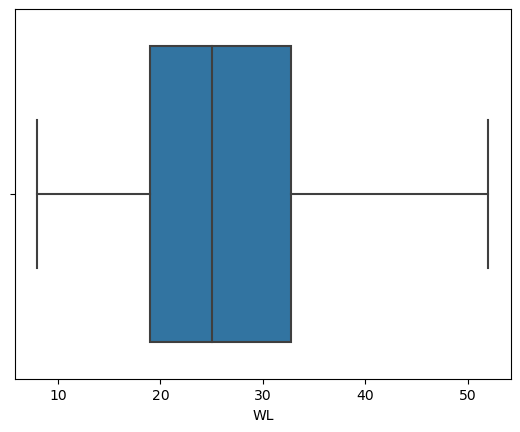

In [63]:
#checking for outliers
sns.boxplot(df_new ['WL'])

<AxesSubplot:>

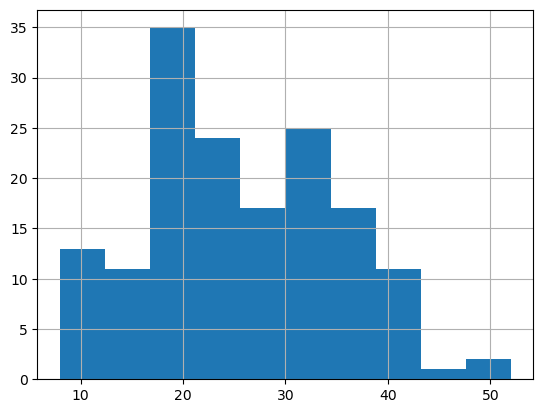

In [64]:
#checking distrobution of dataframe - distributed more to the left
df_new ['WL'].hist()

<AxesSubplot:xlabel='WL', ylabel='Density'>

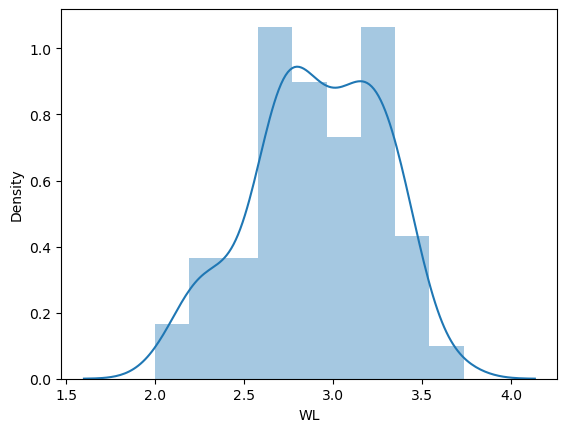

In [65]:
#checking to see if cube root makes the data look better - not great
sns.distplot(np.cbrt(df_new ['WL']))

<AxesSubplot:xlabel='WL', ylabel='Density'>

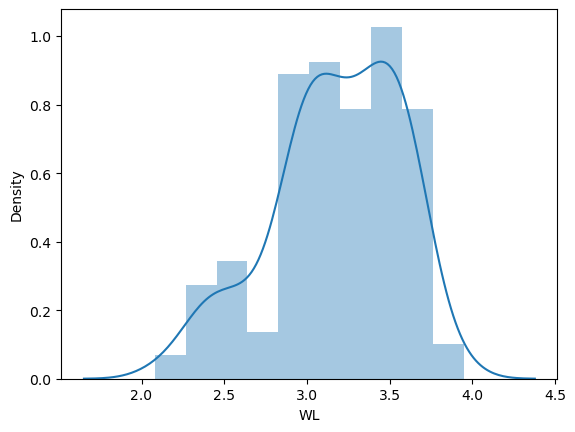

In [66]:
#checking to see if log makes the plot less skewed - not much better
sns.distplot(np.log(df_new ['WL']))

<AxesSubplot:xlabel='WL', ylabel='Density'>

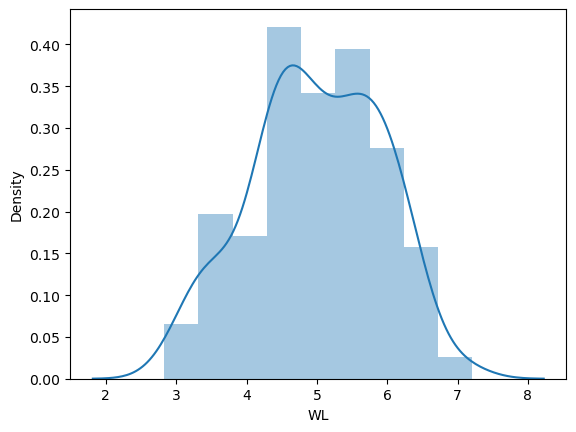

In [67]:
#checking to see if a sqrt makes the data look better - a little better
sns.distplot(np.sqrt(df_new ['WL']))

<AxesSubplot:>

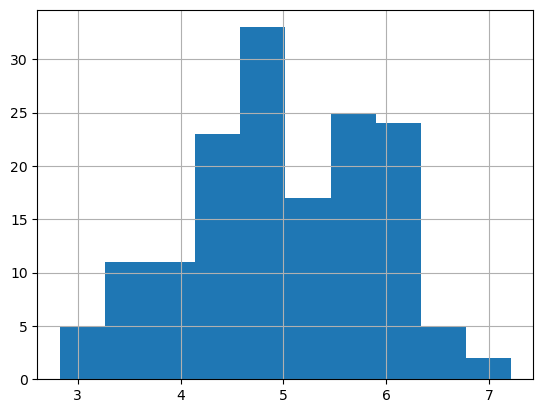

In [68]:
#draw a histogram on top of the sqrt distplot
np.sqrt(df_new['WL']).hist()

<AxesSubplot:>

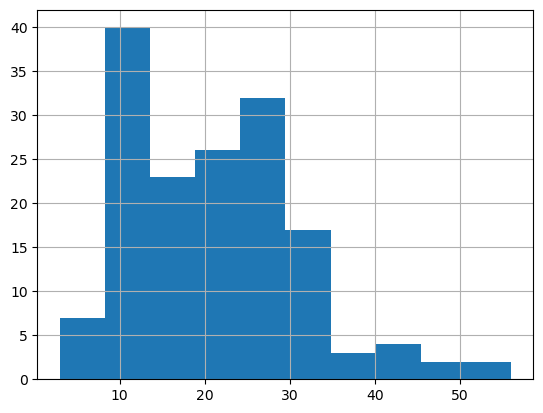

In [69]:
#Yoga Variable
#Check for how skewed the data is - data is pretty skewed to the left
df_new['YS'].hist()

<AxesSubplot:xlabel='YS', ylabel='Density'>

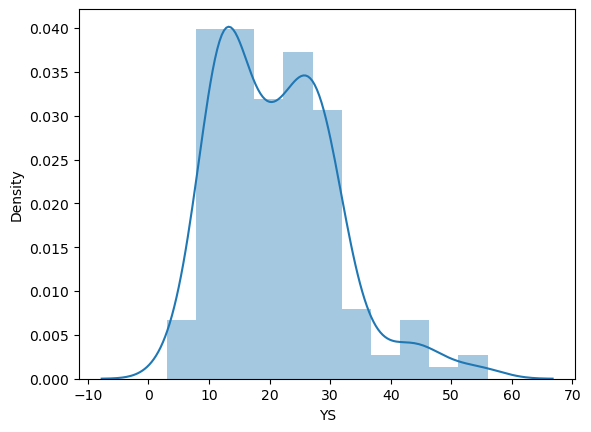

In [70]:
#check to see if cbrt will help the data
sns.distplot(df_new ['YS'])

<AxesSubplot:xlabel='YS', ylabel='Density'>

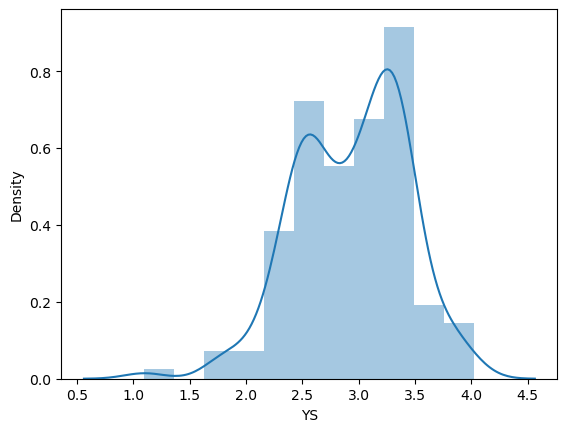

In [71]:
sns.distplot(np.log(df_new ['YS']))

<AxesSubplot:xlabel='YS', ylabel='Density'>

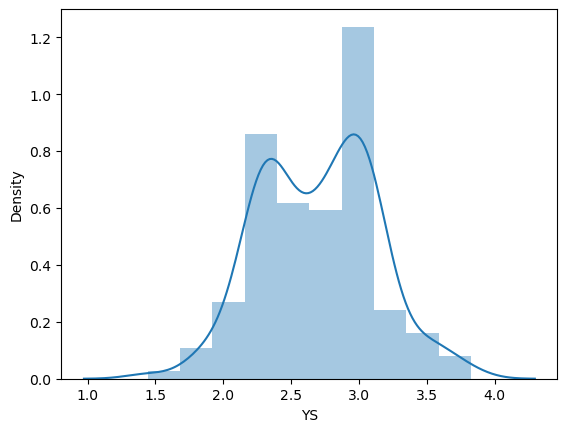

In [72]:
sns.distplot(np.cbrt(df_new ['YS']))

<AxesSubplot:xlabel='YS', ylabel='Density'>

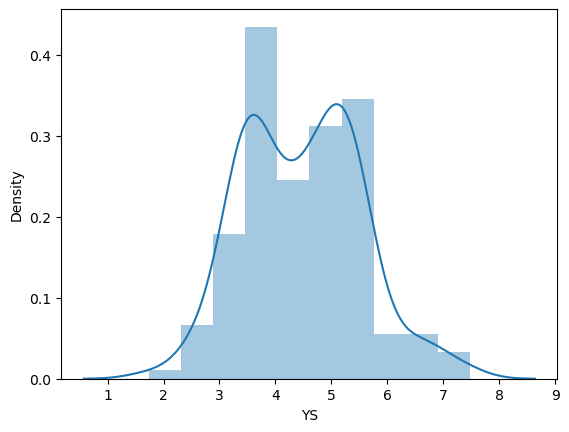

In [73]:
sns.distplot(np.sqrt(df_new ['YS']))

<AxesSubplot:>

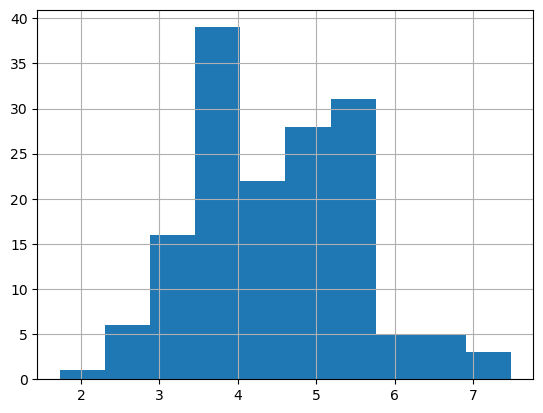

In [74]:
#draw a histogram on top of the sqrt distplot
np.sqrt(df_new['YS']).hist()

<AxesSubplot:>

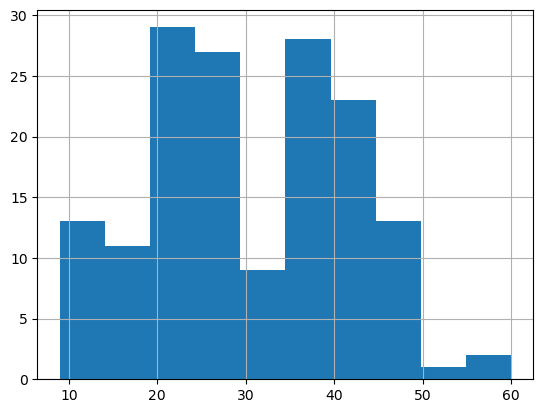

In [75]:
#Laps_Run_Per_Practice_Average Variable
#Check for how skewed the data is - data is pretty skewed to the left
df_new['LRPP'].hist()

<AxesSubplot:xlabel='LRPP', ylabel='Density'>

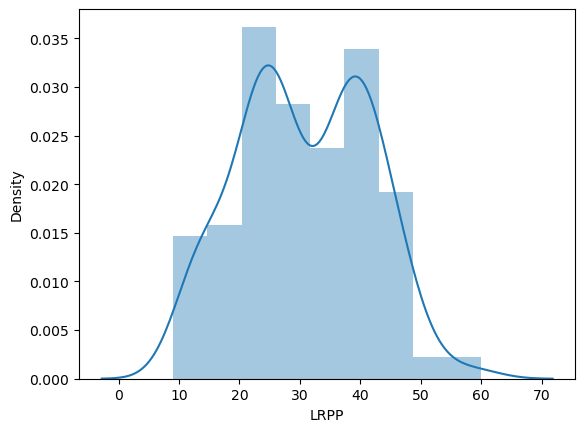

In [76]:
sns.distplot(df_new ['LRPP'])

<AxesSubplot:xlabel='LRPP', ylabel='Density'>

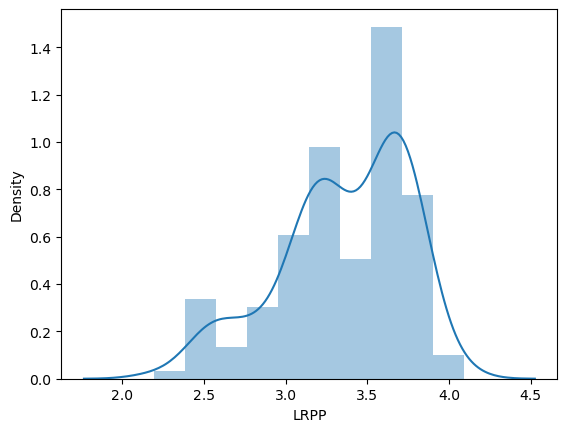

In [77]:
sns.distplot(np.log(df_new ['LRPP']))

<AxesSubplot:xlabel='LRPP', ylabel='Density'>

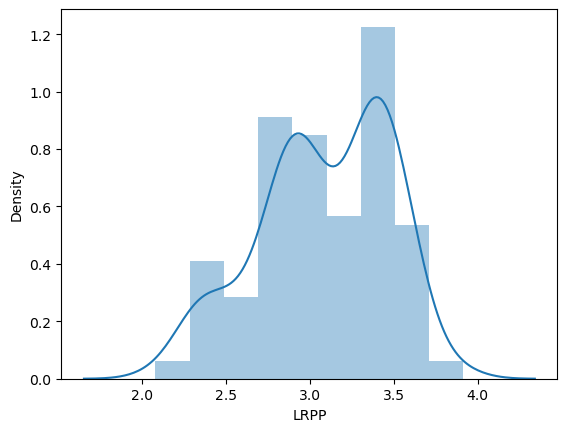

In [78]:
sns.distplot(np.cbrt(df_new ['LRPP']))

<AxesSubplot:xlabel='LRPP', ylabel='Density'>

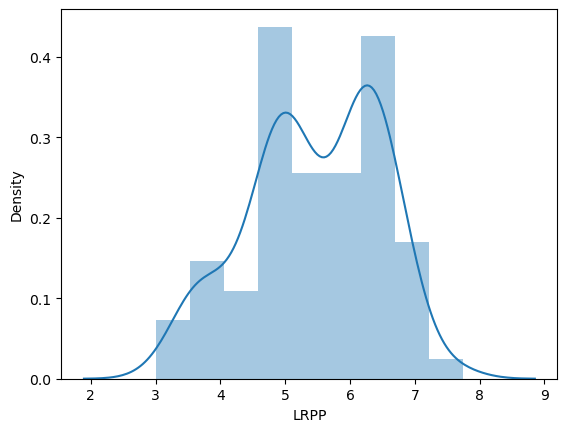

In [79]:
sns.distplot(np.sqrt(df_new ['LRPP']))

<AxesSubplot:>

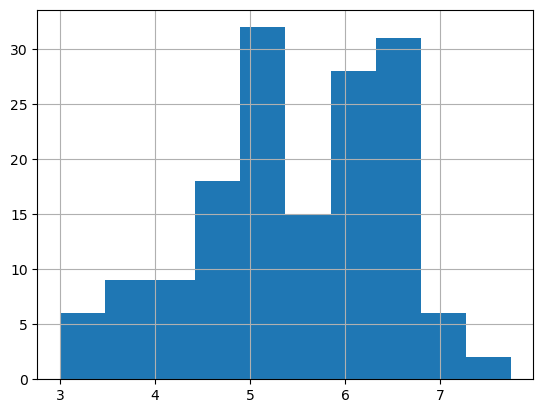

In [80]:
#Laps_Run_Per_Practice_Average Variable
#draw a histogram on top of the sqrt distplot
np.sqrt(df_new['LRPP']).hist()

<AxesSubplot:>

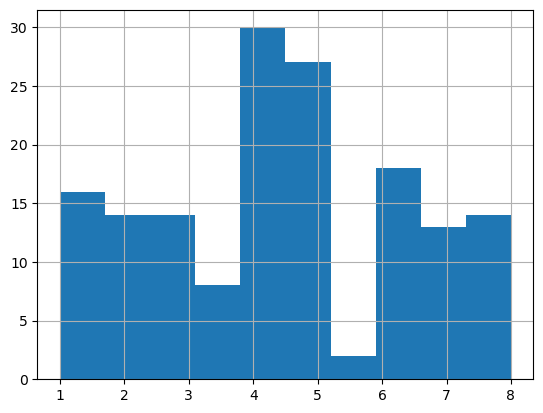

In [81]:
#Players_Absent_For_Sessions
#Check for how skewed the data is - data is pretty skewed to the left
df_new['PAFS'].hist()

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

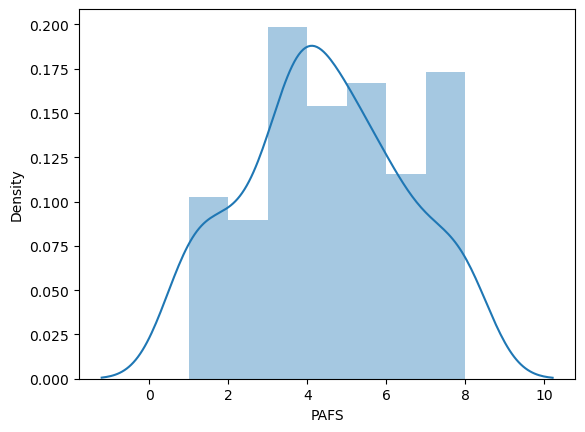

In [82]:
sns.distplot(df_new ['PAFS'])

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

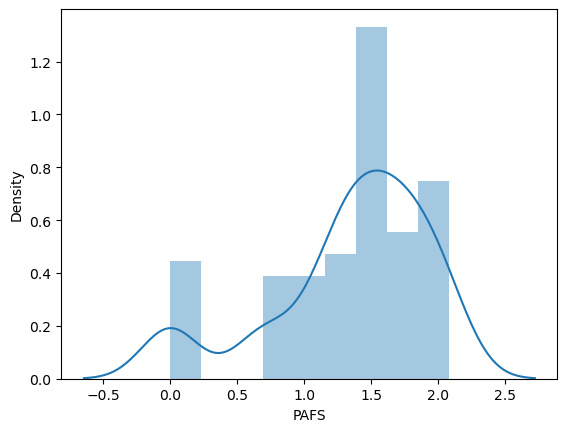

In [83]:
sns.distplot(np.log(df_new ['PAFS']))

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

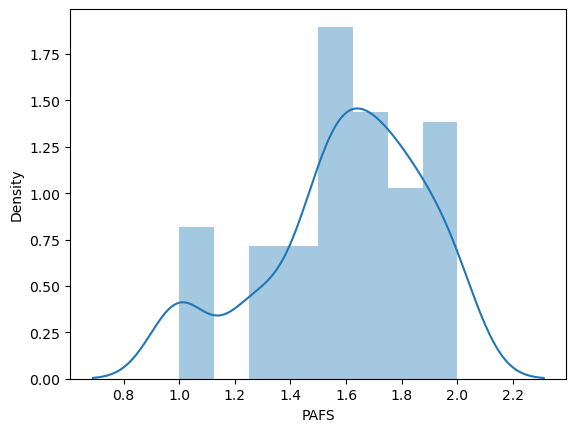

In [84]:
sns.distplot(np.cbrt(df_new ['PAFS']))

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

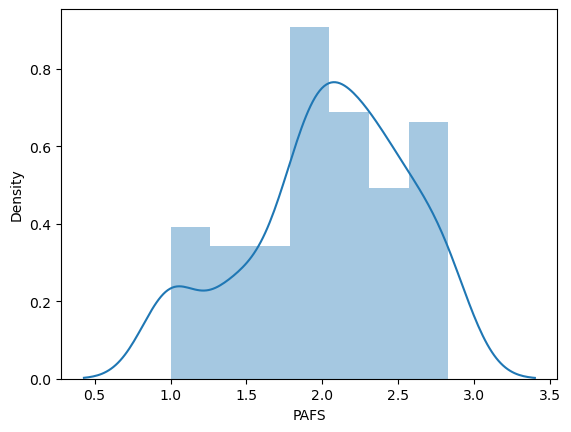

In [85]:
sns.distplot(np.sqrt(df_new ['PAFS']))

<AxesSubplot:>

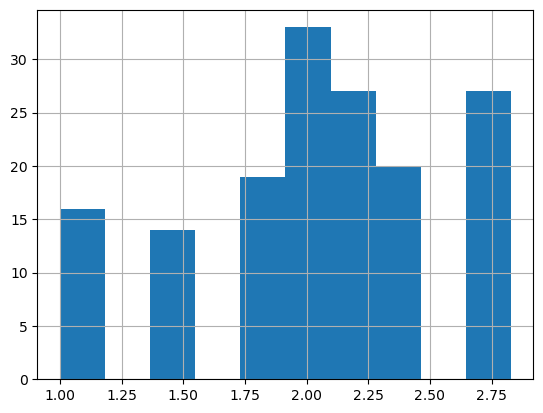

In [86]:
# Players_Absent_For_Sessions Variable
#draw a histogram on top of the sqrt distplot
np.sqrt(df_new['PAFS']).hist()

#### Bivariate Analsis
1. Linear Correlation --> Pearson Corelation

y = x^2

In [87]:
df_clean.shape,df_new.shape

((156, 7), (156, 5))

In [88]:
df_clean.columns

Index(['Team', 'PS', 'WL', 'YS', 'LRPP', 'WI', 'PAFS'], dtype='object')

In [89]:
df_new.columns

Index(['WL', 'YS', 'LRPP', 'WI', 'PAFS'], dtype='object')

In [90]:
df_new['PS']=df_clean['PS']
df_new['Team']=df_clean['Team']

In [91]:
df_new.corr()

,WL,YS,LRPP,WI,PAFS,PS
WL,1.000000,0.940899,0.989656,0.716546,0.001012,0.448556
YS,0.940899,1.000000,0.927862,0.617798,0.026512,0.343593
LRPP,0.989656,0.927862,1.000000,0.776036,0.024935,0.479233
WI,0.716546,0.617798,0.776036,1.000000,0.129837,0.425148
PAFS,0.001012,0.026512,0.024935,0.129837,1.000000,0.048566
PS,0.448556,0.343593,0.479233,0.425148,0.048566,1.000000


Text(0.5, 1.0, 'Linear Correlation Matrix')

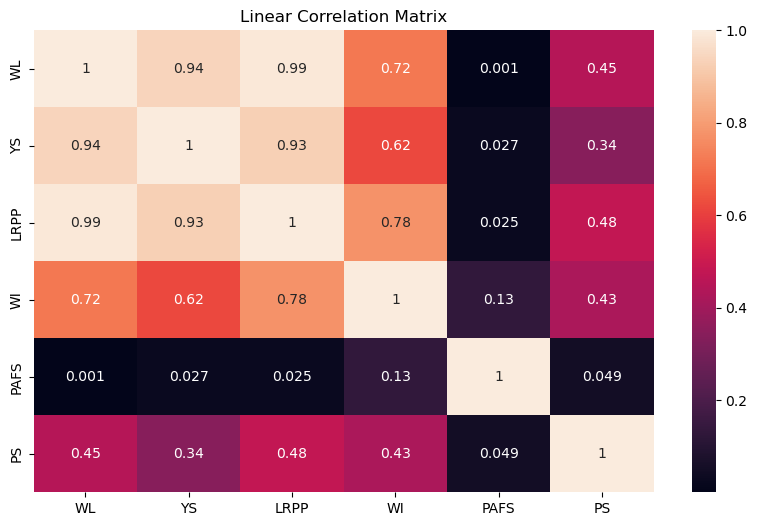

In [93]:
plt.rcParams['figure.figsize']=(10,6)
sns.heatmap(df_new.corr(),annot=True,)

plt.title('Linear Correlation Matrix')

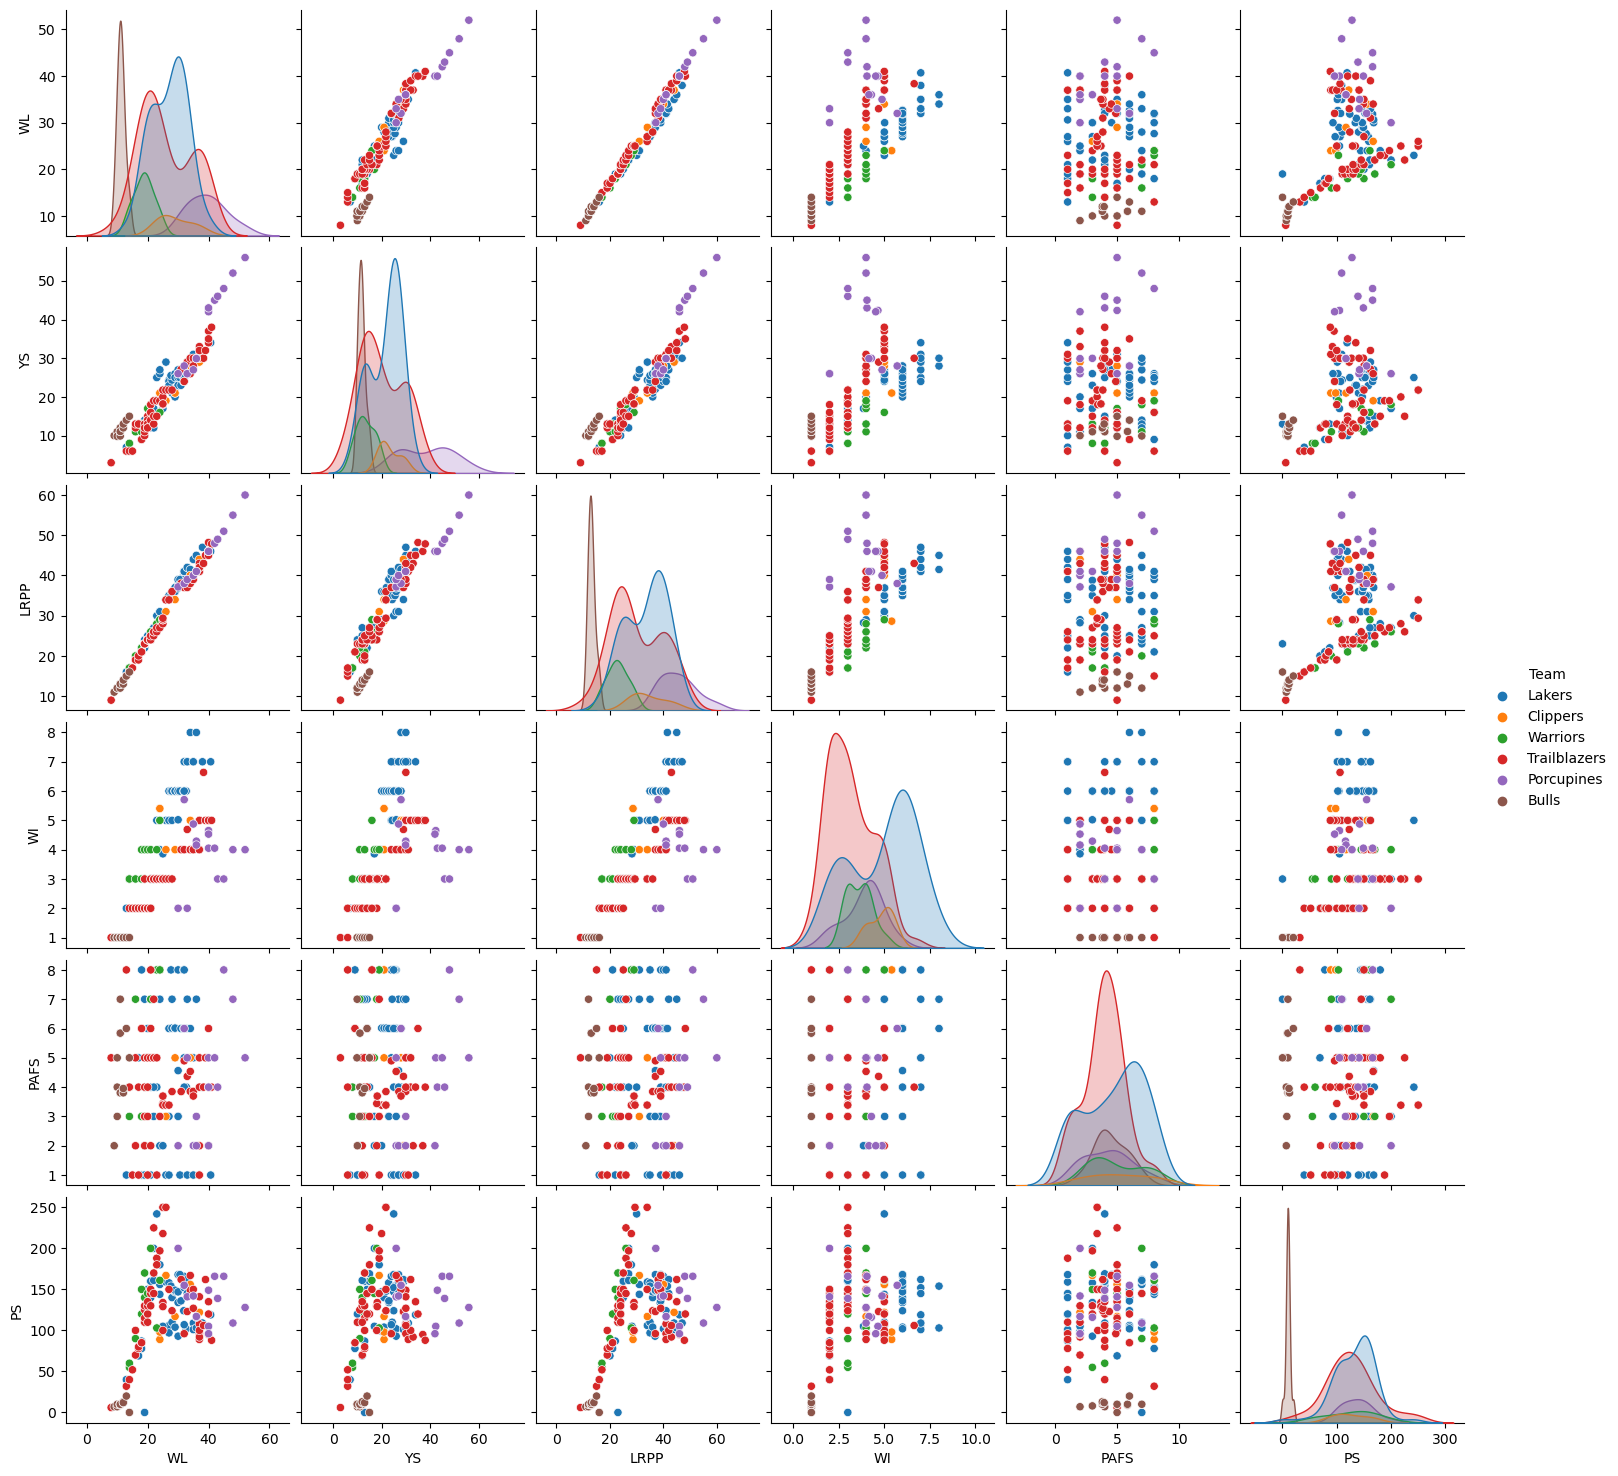

In [94]:
sns.pairplot(df_new, kind = 'scatter', hue = 'Team')

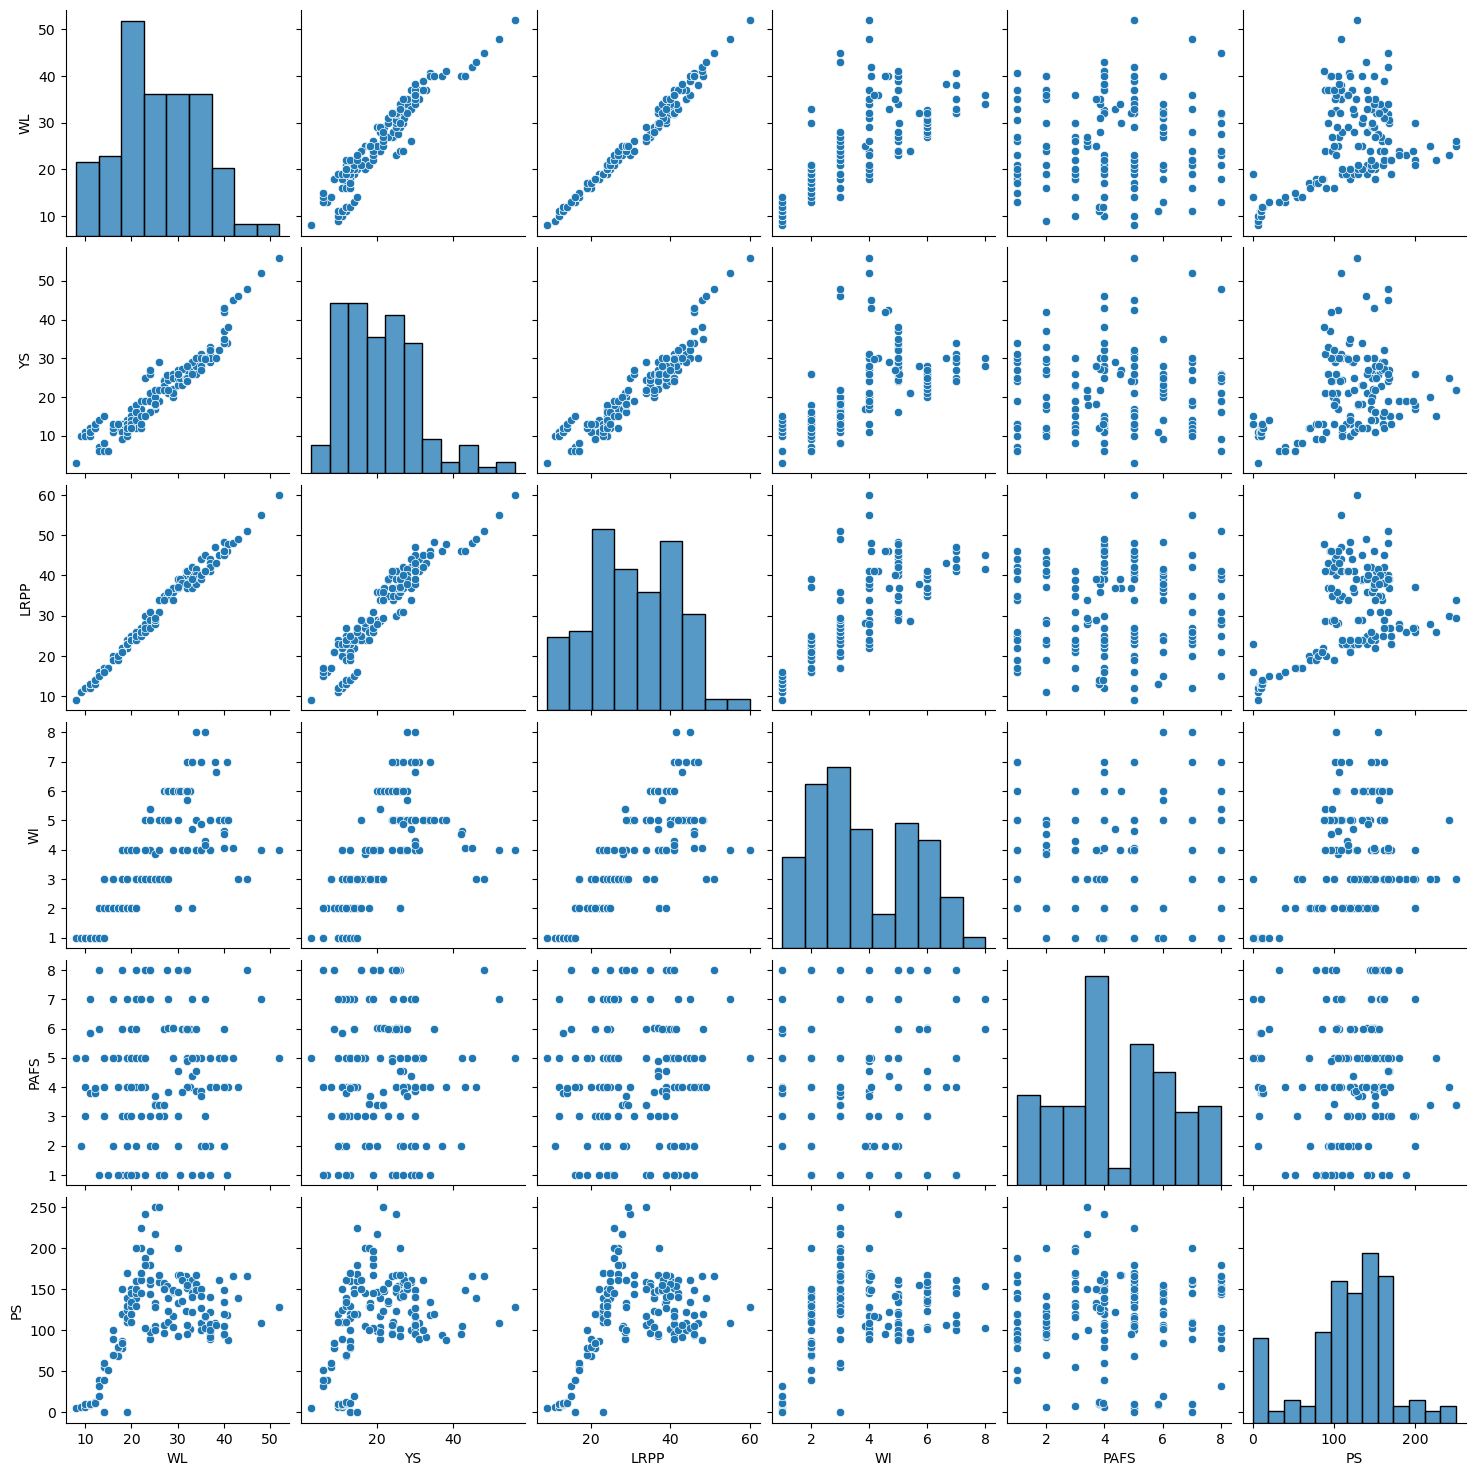

In [95]:
sns.pairplot(df_new, kind = 'scatter')

In [106]:
def chatterjee_corr(df,x,y):
    N = df.shape[0]
    df_rank = df
    
    df_rank['rank'] = df_rank[y].rank()
   #print(df_rank['rank'])
    
    df_rank['rank_x'] = df_rank[x].rank()
    
    df_rank = df_rank.sort_values(by = 'rank_x')
    #1-3*(abs(sum(xri-1 - Xie))))/n square-1
    #Diff --> Summation -> absolute
    
    chatt_corr = 1-3*df_rank['rank'].diff().abs().sum() / (pow(N,2)-1)
    
    return chatt_corr
    

In [107]:
chatterjee_corr(df_new,'WL','PS')

0.4062872405999589

In [108]:
chatterjee_corr(df_new,'WI','PS')

0.39198685021573865

In [109]:
chatterjee_corr(df_new,'YS','PS')

0.2911444421614958

In [110]:
chatterjee_corr(df_new,'LRPP','PS')

0.4229299363057325

In [111]:
chatterjee_corr(df_new,'PAFS','PS')

0.0019930141771111742

### Single Way ANOVA

determine whether team essentially affects the points variable for the dataset

In [130]:
import random

nba_id = list(df_new.index.unique())

random.seed(13)

sample_match_id = random.sample(nba_id,50)

sample_df = df_new[df_new.index.isin(sample_match_id)].reset_index(drop = True)

In [131]:
sample_df

,WL,YS,LRPP,WI,PAFS,PS,Team,rank,rank_x
0,26.000000,29.000000,34.000000,5.000000,1.000000,159,Lakers,126.5,8.5
1,28.000000,24.366748,35.000000,5.000000,7.000000,110,Lakers,62.5,136.0
2,29.000000,25.000000,37.000000,6.000000,6.014168,149,Lakers,110.0,126.5
3,30.000000,25.000000,39.000000,6.000000,8.000000,147,Lakers,106.0,149.5
4,32.712197,28.000000,39.000000,6.000000,4.000000,155,Lakers,121.5,71.5
5,30.604567,25.000000,39.000000,6.000000,1.000000,168,Lakers,140.5,8.5
6,36.000000,30.000000,45.000000,8.000000,7.000000,103,Lakers,49.5,136.0
7,40.701081,34.000000,46.000000,7.000000,1.000000,119,Lakers,69.0,8.5
8,13.000000,7.000000,16.000000,2.000000,1.000000,40,Lakers,18.5,8.5
9,18.000000,9.000000,21.000000,2.000000,8.000000,78,Lakers,25.5,149.5


In [132]:
sample_df = sample_df[['Team','PS']]

groups = sample_df.groupby('Team').count().reset_index()

In [133]:
groups

,Team,PS
0,Bulls,5
1,Clippers,4
2,Lakers,14
3,Porcupines,3
4,Trailblazers,20
5,Warriors,4


#### Normality

In [134]:
import scipy.stats as stats

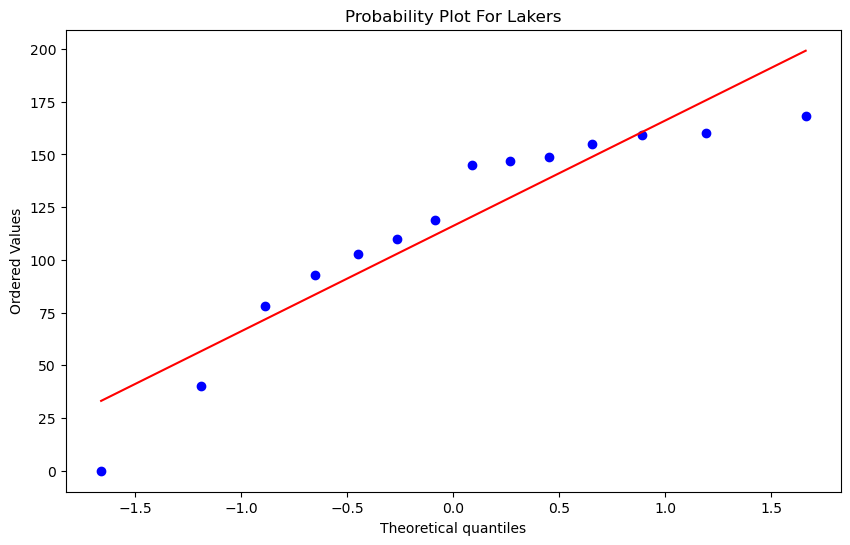

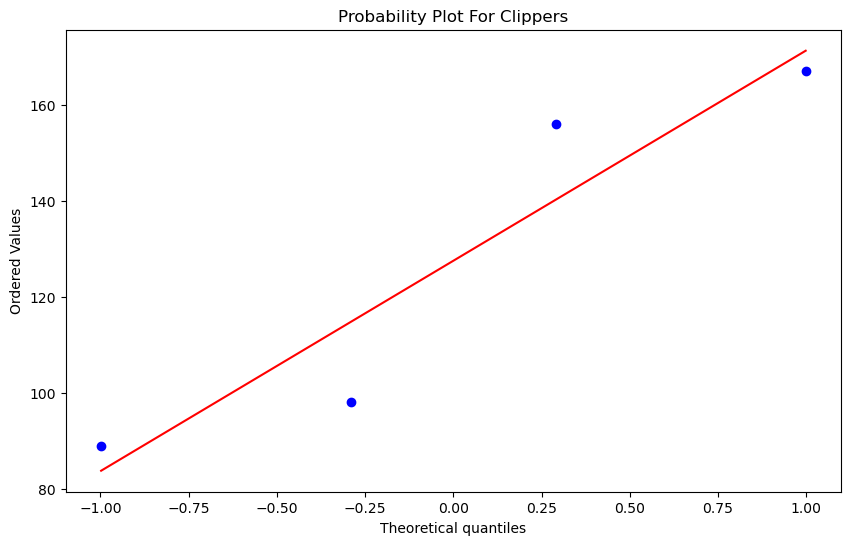

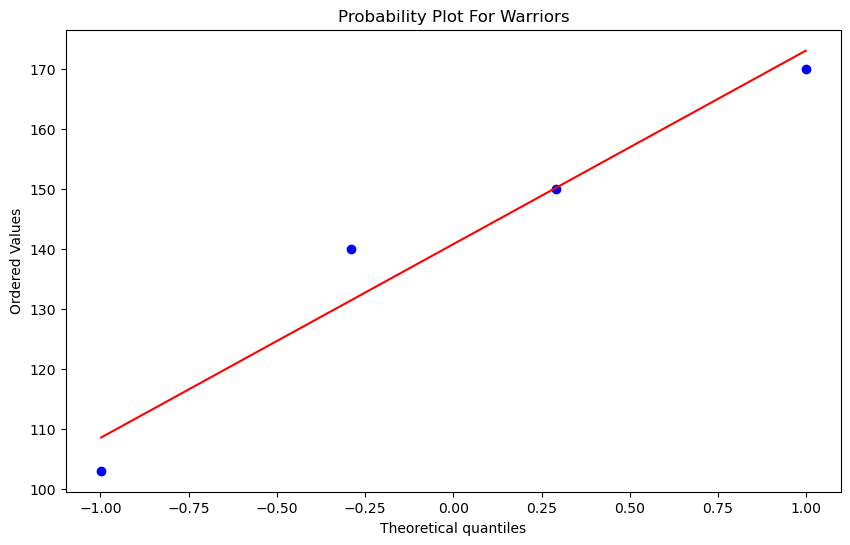

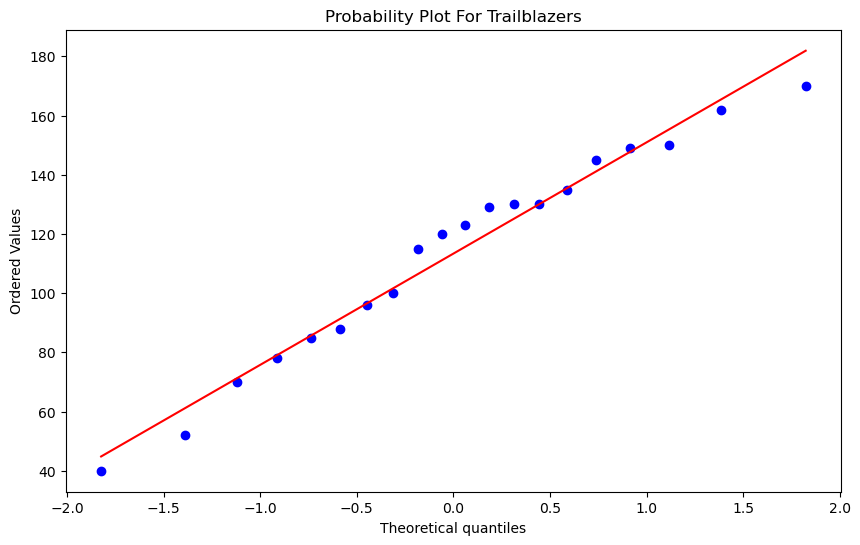

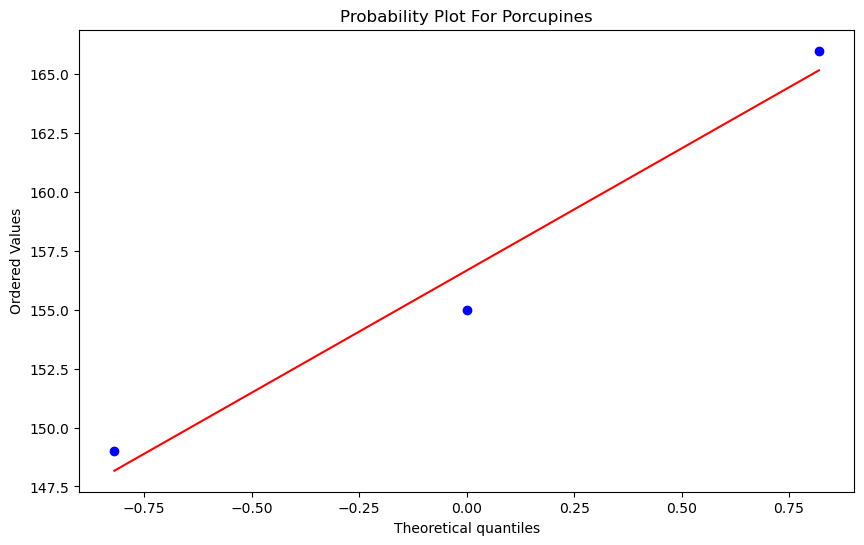

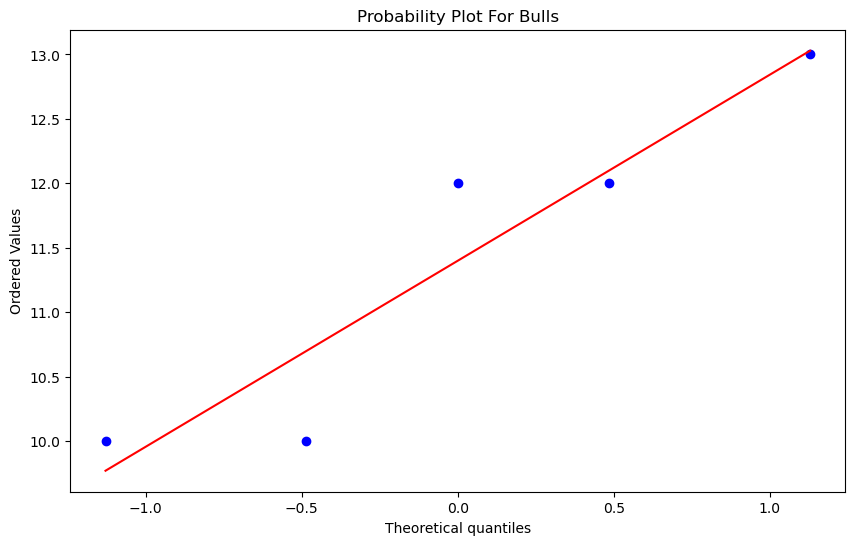

In [135]:
unique_teams = sample_df['Team'].unique()

for i in unique_teams:
    stats.probplot(sample_df[sample_df['Team']==i]['PS'], dist='norm', plot=plt)
    plt.title('Probability Plot For '+i)
    plt.show()

In [136]:
ratio = sample_df.groupby('Team').std().max() / sample_df.groupby('Team').std().min()
ratio

PS    37.164289
dtype: float64

In [138]:
#implement ANOVA from Scratch
data = [['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]

anova_table = pd.DataFrame(data, columns = ['Variation','SS','df','MS', 'F value','P value','F critical'])

anova_table.set_index('Variation', inplace=True)

In [139]:
x_bar = sample_df['PS'].mean()
SSTR = sample_df.groupby('Team').count()*(sample_df.groupby('Team').mean()-x_bar)**2

In [140]:
anova_table['SS']['Between Groups'] = SSTR['PS'].sum()

In [141]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,,,,,,
Total,,,,,,


In [145]:
SSE = (sample_df.groupby('Team').count()-1)*sample_df.groupby('Team').std()**2

In [146]:
SSE

,PS
Team,
Bulls,7.200000
Clippers,4725.000000
Lakers,32319.714286
Porcupines,148.666667
Trailblazers,24798.550000
Warriors,2366.750000


In [147]:
anova_table['SS']['Within Groups'] = SSE['PS'].sum()

In [148]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,64365.880952,,,,,
Total,,,,,,


In [150]:
Total = SSE['PS'].sum() + SSTR['PS'].sum()

In [151]:
anova_table['SS']['Total'] = Total

In [152]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,64365.880952,,,,,
Total,125268.02,,,,,


In [153]:
anova_table['df']['Between Groups'] = sample_df['Team'].nunique()-1
anova_table['df']['Within Groups'] = sample_df.shape[0]-sample_df['Team'].nunique()-1
anova_table['df']['Total'] = sample_df.shape[0]-1

In [154]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,,,,
Within Groups,64365.880952,43,,,,
Total,125268.02,49,,,,


In [156]:
anova_table['MS'] = anova_table['SS']/anova_table['df']
anova_table['F value']['Between Groups'] = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']

anova_table['P value']['Between Groups'] = 1-stats.f.cdf(anova_table['F value']['Between Groups'], 
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

In [157]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,12180.42781,8.137205,0.000018,
Within Groups,64365.880952,43,1496.880952,,,
Total,125268.02,49,2556.490204,,,


In [158]:
alpha = 0.05

hypothesis_type = "two tailed"

if hypothesis_type:
    alpha = alpha/2
    
anova_table['F critical']['Between Groups'] = stats.f.ppf(1-alpha,
                                                           anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

In [159]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,12180.42781,8.137205,0.000018,2.878716
Within Groups,64365.880952,43,1496.880952,,,
Total,125268.02,49,2556.490204,,,


In [169]:
#P value approach

print('Approach for P value')


conclusion = 'Failed to Reject Null Hypothesis'

if anova_table['P value']['Between Groups'] <= alpha:
    conclusion = 'Null Hypothesis is Rejected'

print('P value for the table is ', anova_table['F value']['Between Groups'], 'and p value is ', anova_table['P value']['Between Groups'])


print(conclusion)

Approach for P value
P value for the table is  8.137205427158056 and p value is  1.7975922821267254e-05
Null Hypothesis is Rejected


In [170]:
#P value approach

print('Approach for F critical')


conclusion = 'Failed to Reject Null Hypothesis'

if anova_table['F value']['Between Groups'] <= anova_table['F critical']['Between Groups']:
    conclusion = 'Null Hypothesis is Rejected'

print('F value for the table is ', anova_table['F value']['Between Groups'], 'and F critical value is ', anova_table['F critical']['Between Groups'])


print(conclusion)

Approach for F critical
F value for the table is  8.137205427158056 and F critical value is  2.878715790727257
Failed to Reject Null Hypothesis


### Data Processing
processing data for modeling

In [171]:
one_hot_df = pd.get_dummies(df_clean, columns = ['Team'], drop_first = True)

In [172]:
one_hot_df.head()

,PS,WL,YS,LRPP,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
0,242,23.0,25.0,30.0,5.0,4.0,0,1,0,0,0
1,144,24.0,26.0,31.0,5.0,8.0,0,1,0,0,0
2,156,24.0,27.0,31.0,5.0,7.0,0,1,0,0,0
3,159,26.0,29.0,34.0,5.0,1.0,0,1,0,0,0
4,106,27.0,NaN,34.0,5.0,6.0,0,1,0,0,0


In [173]:
one_hot_df.columns

Index(['PS', 'WL', 'YS', 'LRPP', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors'],
      dtype='object')

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [176]:
X = one_hot_df[['WL', 'YS', 'LRPP', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]
y = one_hot_df['PS']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

print('X train dimension is ', X_train.shape)
print('y train dimension is ', y_train.shape)
print('X test dimension is ', X_test.shape)
print('y test dimension is ', y_test.shape)


X train dimension is  (124, 10)
y train dimension is  (124,)
X test dimension is  (32, 10)
y test dimension is  (32,)


In [179]:
# Start Imputing Here

imputer = LGBMImputer(n_iter=15, verbose = True)

X_train_full = imputer.fit_transform(X_train)

X_train_clean = pd.DataFrame(X_train_full, columns = X_train.columns)

X_train_clean.head()

  0%|          | 0/5 [00:00<?, ?it/s]

,WL,YS,LRPP,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
62,14.0,8.0,17.0,3.0,4.0,0,0,0,0,1
58,29.0,21.0,34.0,4.0,5.0,1,0,0,0,0
1,24.0,26.0,31.0,5.0,8.0,0,1,0,0,0
70,23.0,19.0,28.0,4.0,8.0,0,0,0,0,1
140,48.0,52.0,55.0,4.0,7.0,0,0,1,0,0


### Modeling
Linear Regression Modeling (requires less time)

In [181]:
import statsmodels.api as am

result = sm.OLS(y_train, X_train_clean).fit()

In [182]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PS   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              120.7
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                    8.10e-56
Time:                        16:34:10   Log-Likelihood:                         -625.23
No. Observations:                 124   AIC:                                      1270.
Df Residuals:                     114   BIC:                                      1299.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [183]:
X_const=sm.add_constant(X_train_clean)

result = sm.OLS(y_train, X_const).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PS   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     12.08
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           5.55e-14
Time:                        17:14:31   Log-Likelihood:                -624.51
No. Observations:                 124   AIC:                             1271.
Df Residuals:                     113   BIC:                             1302.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -17.9526     15.59

In [184]:
test=pd.DataFrame(imputer.transform(X_test))


  0%|          | 0/5 [00:00<?, ?it/s]

In [188]:
#If you do not add the constant you will recieve an error because the data frame knows there are 10 dimensions, 
#but in the modeling we created 11 dimensions
res = result.predict(sm.add_constant(test[['WL', 'YS', 'LRPP', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]))

In [186]:
test.columns

Index(['WL', 'YS', 'LRPP', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors'],
      dtype='object')

In [189]:
#RMSE, MAE, MSE

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [191]:
print('MAE of the model is', mean_absolute_error(y_test,res))

MAE of the model is 33.40193422810201


In [192]:
print('MSE of the model is', mean_squared_error(y_test,res))

MSE of the model is 1849.0035380341556


In [194]:
print('RMSE of the model is', np.sqrt(mean_squared_error(y_test, res)))

RMSE of the model is 43.00004113991236


In [197]:
from sklearn import metrics
print('R2 Scopre for test is', metrics.r2_score(y_test, res))

R2 Scopre for test is 0.1444486514790546


In [198]:
#Line is not a good fit and so we are going for polynomials
#We will create a line as well as a polynomial for comparison

#numpy.polyfit
#numpy.linespace -> create space and plot values -> Space creation using args
#numpy.poly1d -> To create the polynomial equation


generate a scatter plot of a feature and label and overlays three polynomial regression models on top of the scatter plot. The function takes two arguments: feature, which is a column from a data set, and label, which is the target variable.

The function begins by converting the feature and label variables to 1D arrays, and then fits three polynomial models to the data using the polyfit() function from numpy. The first model is a linear model (degree 1), the second is a quadratic model (degree 2), and the third is a cubic model (degree 3). The function then generates a set of x-values using the linspace() function and plots the original data as a scatter plot, as well as the three polynomial models using the scatter() and plot() functions from matplotlib. Finally, the function adds labels to the x-axis, y-axis, and legend, and displays the plot using the show() function.

Overall, the create_polynomial_plot() function is a useful tool for visualizing the relationship between a feature and label and comparing different polynomial regression models. It is likely being used in a data science project to understand the relationship between different variables and to choose the most appropriate model for predicting the target variable.

In [221]:
def create_polynomial_plot(feature, label):
    #convert to 1d
    x_coordinates=feature
    y_coordinates=np.squeeze(label)
    
    linear_poly = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    quadratic_poly = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))
    cubic_poly = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 3))
    
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))
    plt.scatter(x_coordinates, y_coordinates, color= 'blue')
    plt.plot(values, linear_poly(values), color = 'cyan', label = 'Linear Model')
    plt.plot(values, quadratic_poly(values), color = 'red', label = 'Quadratic Model')
    plt.plot(values, cubic_poly(values), color = 'orange', label = 'Cubic Model')
    
    plt.xlabel('%s from data' %(feature.name))
    plt.ylabel('Points Scored')
    
    plt.rcParams['figure.figsize']=(12,6)
    plt.legend()
    plt.title('Linear vs Quadratic')
    
    plt.show()

In [222]:
df_clean.head()

,Team,PS,WL,YS,LRPP,WI,PAFS
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


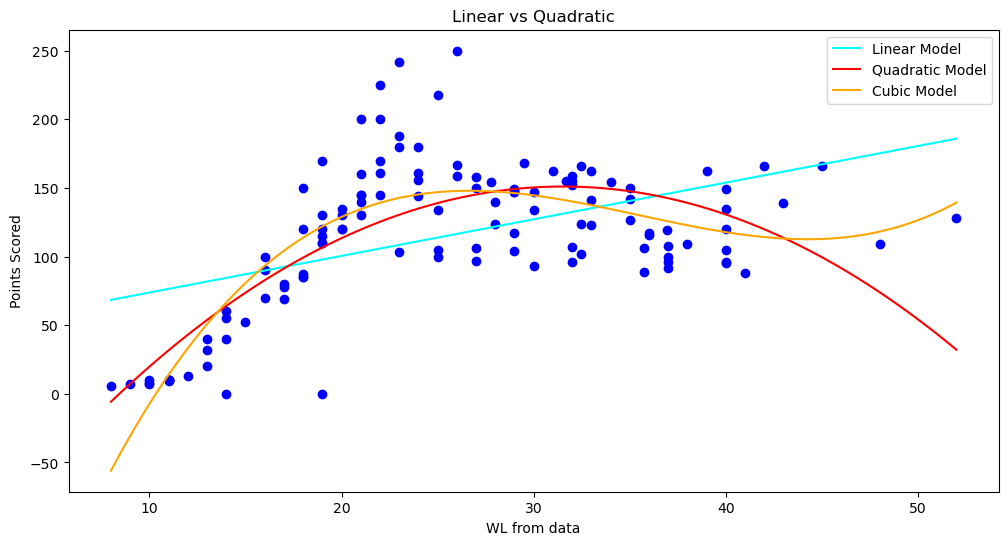

In [223]:
create_polynomial_plot(X_train_clean.WL, y_train )

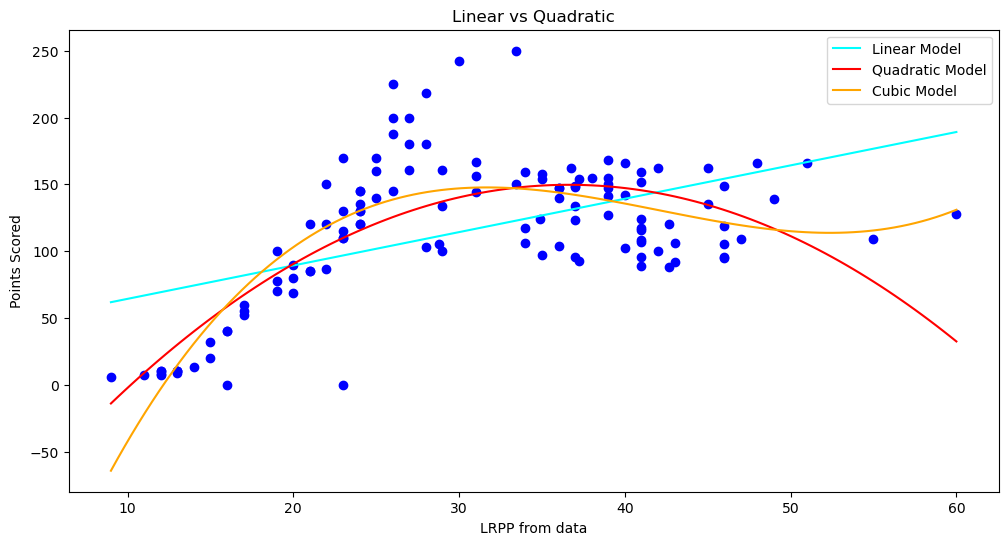

In [224]:
create_polynomial_plot(X_train_clean.LRPP, y_train )

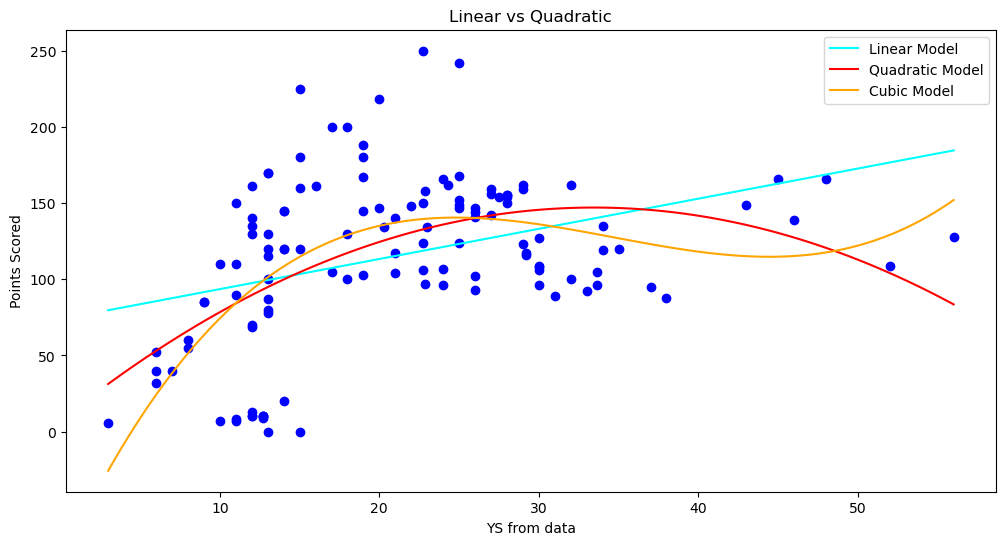

In [225]:
create_polynomial_plot(X_train_clean.YS, y_train )

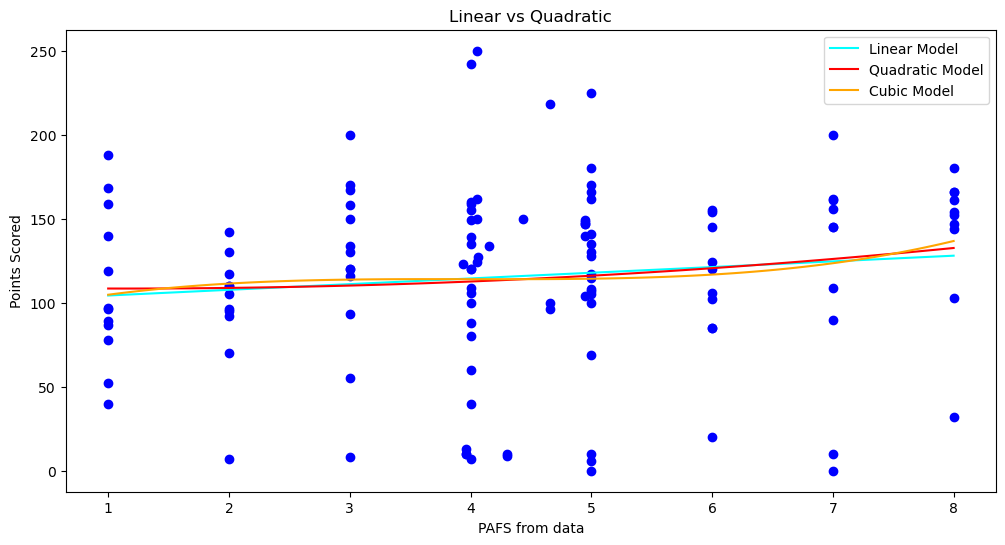

In [226]:
create_polynomial_plot(X_train_clean.PAFS, y_train )

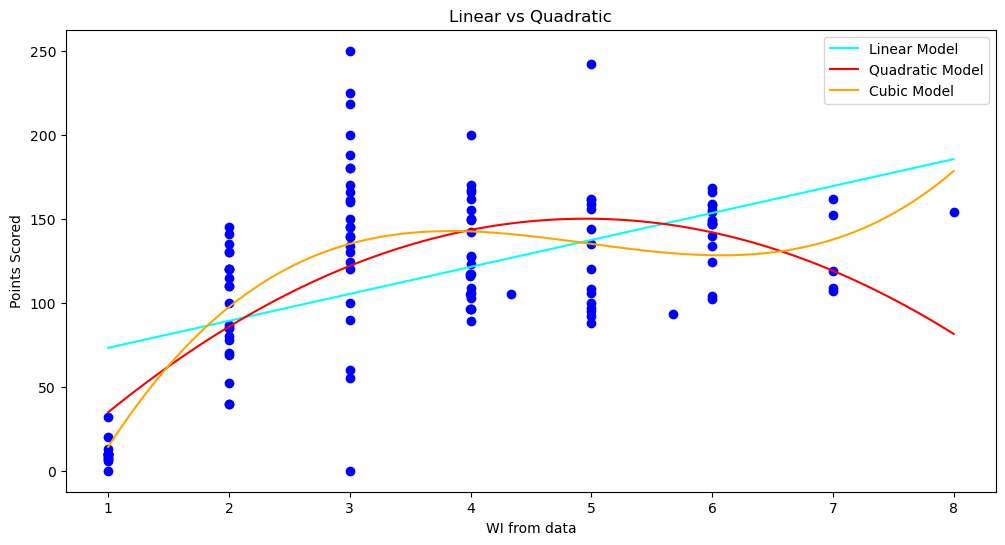

In [227]:
create_polynomial_plot(X_train_clean.WI, y_train )

In [228]:
#######
#1. Create a set of polynomial features
#2. Apply a linear regressioon
######

In [229]:
from sklearn.preprocessing import PolynomialFeatures

In [247]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train_clean)

poly.fit(X_poly,y_train)

PolynomialFeatures(degree=4)

In [248]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

lm.fit(X_poly, y_train)

LinearRegression()

In [249]:
#Doing predictions on test data

predictions = lm.predict(poly.fit_transform(test))

print('R2 Scopre for test is', metrics.r2_score(y_test, predictions))


R2 Scopre for test is -281.6731518820354


In [250]:
print('RMSE of the model is', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE of the model is 781.6064087768581


In [ ]:
# Degree 1 ---> RMSE - 43.00 R2 - 0.144
# Degree 2 ---> RMSE - 48.4 R2 - -0.085
# Degree 3 ---> RMSE - 3290.57 R2 - -5009.154
# Degree 4 ---> RMSE - 781.606 R2 - -281.673